# _Weather Long-term Time Series Forecasting_ (Kaggle)

***Origen de datos:** [Kaggle Dataset](https://www.kaggle.com/datasets/alistairking/weather-long-term-time-series-forecasting)*

**Descripción del Dataset**

El clima se registra cada 10 minutos a lo largo de todo el **año 2020**, y comprende **20 indicadores meteorológicos** medidos en una estación climática del **Instituto Max Planck**. El conjunto de datos proporciona mediciones atmosféricas exhaustivas que incluyen la temperatura del aire, la humedad, los patrones de viento, la radiación y la precipitación.

Con más de **52.560 puntos de datos** por variable (*365 días × 24 horas × 6 mediciones por hora*), este muestreo de alta frecuencia ofrece información detallada sobre los patrones climáticos y las condiciones atmosféricas. Las mediciones incluyen tanto parámetros meteorológicos básicos como cantidades derivadas como el déficit de presión de vapor y la temperatura potencial, lo que lo hace adecuado tanto para la investigación meteorológica como para aplicaciones prácticas.

| Columna | Descripción | Unidad |
| :--- | :---  | :---  |
| **date** | Fecha y hora de la observación. | DateTime |
| **p** | Presión atmosférica. | milibares (mbar) |
| **T** | Temperatura del aire. | grados Celsius (°C) |
| **Tpot** | Temperatura potencial (temperatura que tendría una parcela de aire si se moviera a un nivel de presión estándar). | Kelvin (K) |
| **Tdew** | Temperatura de punto de rocío (temperatura a la que el aire se satura con humedad). | grados Celsius (°C) |
| **rh** | Humedad relativa (cantidad de humedad en el aire respecto al máximo que puede contener a esa temperatura). | porcentaje (%) |
| **VPmax** | Presión de vapor máxima (presión máxima ejercida por el vapor de agua a la temperatura dada). | milibares (mbar) |
| **VPact** | Presión de vapor actual (presión de vapor de agua actual en el aire). | milibares (mbar) |
| **VPdef** | Déficit de presión de vapor (diferencia entre VPmax y VPact, utilizado para medir el potencial de secado). | milibares (mbar) |
| **sh** | Humedad específica (masa de vapor de agua por kilogramo de aire). | gramos por kilogramo (g/kg) |
| **H2OC** | Concentración de vapor de agua. | milimoles por mol (mmol/mol) de aire seco |
| **rho** | Densidad del aire (masa de aire por unidad de volumen). | gramos por metro cúbico (g/m³) |
| **wv** | Velocidad del viento. | metros por segundo (m/s) |
| **max. wv** | Velocidad máxima del viento registrada durante el periodo. | metros por segundo (m/s) |
| **wd** | Dirección del viento (dirección desde la que sopla el viento). | grados (°) |
| **OT** | Puede referirse a "Operational Timestamp" (Marca de tiempo operacional) o desplazamiento de tiempo; requiere clarificación contextual. | N/A |
<!-- | **rain** | Lluvia total caída. | milímetros (mm) |
| **raining** | Duración de la precipitación. | segundos (s) |
| **SWDR** | Radiación de onda corta descendente (radiación solar entrante). | vatios por metro cuadrado (W/m²) |
| **PAR** | Radiación fotosintéticamente activa (cantidad de luz disponible para la fotosíntesis). | micromoles por metro cuadrado por segundo (µmol/m²/s) |
| **max. PAR** | Máxima radiación fotosintéticamente activa registrada en el período. | µmol/m²/s |
| **Tlog** | Temperatura registrada (potencialmente de un sensor secundario o registrador). | grados Celsius (°C) | -->


### Importación del dataset

In [93]:
#!pip install pandas numpy matplotlib seaborn statsmodels

In [94]:
# Librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [95]:
# Configuraciones de visualización
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')
plt.rc('figure', figsize=(16, 6))
plt.rc('font', size=14)

In [96]:
# Alternativamente, importación local
df = pd.read_csv(f"./max_planck_weather_ts.csv")
df_path = ""

In [97]:
df.head()

Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0  01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
1  01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2  01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
3  01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
4  01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0          3.33          3.11          0.22       1.94             3.12   
1          3.23          3.02          0.21       1.89             3.03   
2          3.21          3.01          0.20       1.88             3.02   
3          3.26          3.07          0.19       1.92             3.08   
4          3.27          3.08          0.19       1.92             3.09   

   rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
0       1307.75      1.03           1.75     152.3  
1       1309.80      0.72           1.50     136.1  
2       1310.24      0.19           0.63     171.6  
3       1309.19      0.34           0.50     198.0  
4       1309.00      0.32           0.63     214.3

#### Renaming

Podemos notar que es necesario realizar un ajuste a los nombres de las variables para reutilizar el notebook.

In [98]:
df.columns

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

In [99]:
# 1. Set 'Date Time' as the index
df = df.set_index('Date Time')

# 2. Create the mapping for renaming the existing columns
# Note: This only includes columns that were present in the original list.
rename_mapping = {
    'p (mbar)': 'p',
    'T (degC)': 'T',
    'Tpot (K)': 'Tpot',
    'Tdew (degC)': 'Tdew',
    'rh (%)': 'rh',
    'VPmax (mbar)': 'VPmax',
    'VPact (mbar)': 'VPact',
    'VPdef (mbar)': 'VPdef',
    'sh (g/kg)': 'sh',
    'H2OC (mmol/mol)': 'H2OC',
    'rho (g/m**3)': 'rho',
    'wv (m/s)': 'wv',
    'max. wv (m/s)': 'max. wv',
    'wd (deg)': 'wd'
}

# 3. Apply the renaming
df = df.rename(columns=rename_mapping)

# There are 6 extra columns missing:
# 'rain', 'raining', 'SWDR', 'PAR', 'max. PAR', 'Tlog'

Es importante destacar también que en este caso no se cuenta con datos de lluvia ni radiación solar:
- `rain`
- `raining`
- `SWDR`
- `PAR`
- `max. PAR`
- `Tlog` _(Posiblemente derivable de T)_

In [100]:
# Fixed format
df.columns

Index(['p', 'T', 'Tpot', 'Tdew', 'rh', 'VPmax', 'VPact', 'VPdef', 'sh', 'H2OC',
       'rho', 'wv', 'max. wv', 'wd'],
      dtype='object')

# Análisis Exploratorio (EDA)

## Reconocimiento de features

In [101]:
df.columns

Index(['p', 'T', 'Tpot', 'Tdew', 'rh', 'VPmax', 'VPact', 'VPdef', 'sh', 'H2OC',
       'rho', 'wv', 'max. wv', 'wd'],
      dtype='object')

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420551 entries, 01.01.2009 00:10:00 to 01.01.2017 00:00:00
Data columns (total 14 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   p        420551 non-null  float64
 1   T        420551 non-null  float64
 2   Tpot     420551 non-null  float64
 3   Tdew     420551 non-null  float64
 4   rh       420551 non-null  float64
 5   VPmax    420551 non-null  float64
 6   VPact    420551 non-null  float64
 7   VPdef    420551 non-null  float64
 8   sh       420551 non-null  float64
 9   H2OC     420551 non-null  float64
 10  rho      420551 non-null  float64
 11  wv       420551 non-null  float64
 12  max. wv  420551 non-null  float64
 13  wd       420551 non-null  float64
dtypes: float64(14)
memory usage: 48.1+ MB


In [103]:
print(f"Los registros comprenden todas las fechas entre {min(df.index)} y {max(df.index)}")

Los registros comprenden todas las fechas entre 01.01.2009 00:10:00 y 31.12.2016 23:50:00


Son mediciones regulares tomadas a intervalos de 10 min.

In [104]:
df.describe().T

count         mean        std      min      25%      50%      75%  \
p        420551.0   989.212776   8.358481   913.60   984.20   989.58   994.72   
T        420551.0     9.450147   8.423365   -23.01     3.36     9.42    15.47   
Tpot     420551.0   283.492743   8.504471   250.60   277.43   283.47   289.53   
Tdew     420551.0     4.955854   6.730674   -25.01     0.24     5.22    10.07   
rh       420551.0    76.008259  16.476175    12.95    65.21    79.30    89.40   
VPmax    420551.0    13.576251   7.739020     0.95     7.78    11.82    17.60   
VPact    420551.0     9.533756   4.184164     0.79     6.21     8.86    12.35   
VPdef    420551.0     4.042412   4.896851     0.00     0.87     2.19     5.30   
sh       420551.0     6.022408   2.656139     0.50     3.92     5.59     7.80   
H2OC     420551.0     9.640223   4.235395     0.80     6.29     8.96    12.49   
rho      420551.0  1216.062748  39.975208  1059.45  1187.49  1213.79  1242.77   
wv       420551.0     1.702224  65.446714 -9999.00     0.99     1.76     2.86   
max. wv  420551.0     3.056555  69.016932 -9999.00     1.76     2.96     4.74   
wd       420551.0   174.743738  86.681693     0.00   124.90   198.10   234.10   

             max  
p        1015.35  
T          37.28  
Tpot      311.34  
Tdew       23.11  
rh        100.00  
VPmax      63.77  
VPact      28.32  
VPdef      46.01  
sh         18.13  
H2OC       28.82  
rho      1393.54  
wv         28.49  
max. wv    23.50  
wd        360.00

In [105]:
# Add derived time features
df.index = pd.to_datetime(df.index, format='%d.%m.%Y %H:%M:%S')
df['hour'] = df.index.hour
df['month'] = df.index.month
df['day'] = df.index.day

In [106]:
def analyze_extreme_events(df):
    """
    Identify and analyze extreme weather events
    """
    extremes = {
        'highest_temp': df['T'].max(),
        'lowest_temp': df['T'].min(),
        'highest_wind': df['wv'].max(),
        # 'max_daily_rain': df.resample('D')['rain'].sum().max(),
        'hottest_day': df.resample('D')['T'].mean().idxmax(),
        'coldest_day': df.resample('D')['T'].mean().idxmin(),
        'wind_direction': df.groupby('wd')['wv'].count().idxmax()
    }
    
    return extremes

# Extreme events
print("\nEventos extremos:")
extremes = analyze_extreme_events(df)
for event, value in extremes.items():
    print(f"- {event}: {value}")


Eventos extremos:
- highest_temp: 37.28
- lowest_temp: -23.01
- highest_wind: 28.49
- hottest_day: 2015-07-04 00:00:00
- coldest_day: 2012-02-06 00:00:00
- wind_direction: 211.2


### Observaciones
#### 1. Características Climáticas Generales

El conjunto de datos, con 420.551 registros, cubre un amplio rango estacional:

* **Temperatura (`T`)**: La temperatura promedio es de 9.45 °C, con un rango muy amplio que abarca desde temperaturas extremas bajo cero (mínimo: -23.01 °C) hasta temperaturas elevadas (máximo: 37.28 °C).

* **Humedad (`rh`)**: La humedad relativa es **generalmente alta**, con una media del 76.01% y una mediana del 79.30%. El registro alcanza el 100%, indicando periodos de saturación completa.

* **Presión (`p`)**: La presión atmosférica es relativamente **estable**, con una media de 989.21 mbar y una baja desviación estándar (8.36).

* **Dirección del Viento (`wd`)**: Los vientos dominantes tienen una dirección promedio cercana al 177 ° (Sur), con una dispersión amplia (rango de 0.00° a 360.00°).

#### 3. Indicadores de Calidad de Datos (Valores Atípicos/Errores)

Los datos presentan códigos de error que requieren tratamiento, identificados por el valor **-9999.00**:

* **Velocidad del Viento (`wv` y `max. wv`)**: El valor mínimo de **-9999.00** es un código de error o valor faltante. Este dato ha distorsionado gravemente la desviación estándar (43.60), haciendo que el cálculo de la media (2.00) no sea representativo.

Es crucial **filtrar o imputar** estos registros si se desea utilizar esos datos.

## Estudio de la Distribución

In [107]:
# Durante el análisis de la distribución se aplicó Downsampling Diario (6:1)
# Esto se hizo con el objetivo de poder ver las series de tiempo sin tanto ruido
df_daily = df.resample('D').mean()

/var/folders/83/9353kc_5517028y13dxby8y40000gn/T/ipykernel_88242/858537153.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='month', y='T', ax=ax1, palette='Set2')


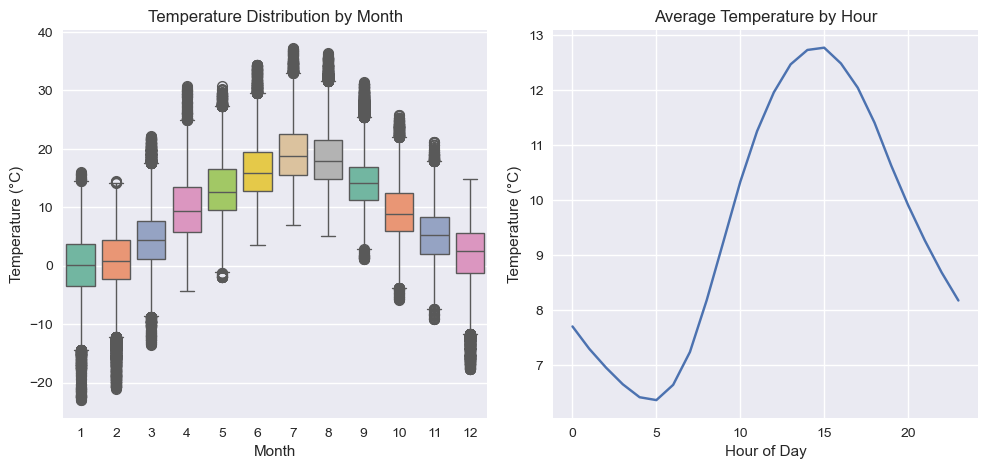

In [108]:
plt.style.use('seaborn-v0_8')

# Create main figure with three subplots
fig = plt.figure(figsize=(15, 9))

# Temperature variation by month
ax1 = plt.subplot(231)
sns.boxplot(data=df, x='month', y='T', ax=ax1, palette='Set2')
ax1.set_title('Temperature Distribution by Month')
ax1.set_xlabel('Month')
ax1.set_ylabel('Temperature (°C)')

# Daily temperature pattern
ax2 = plt.subplot(232)
hourly_temp = df.groupby('hour')['T'].mean()
ax2.plot(hourly_temp.index, hourly_temp.values)
ax2.set_title('Average Temperature by Hour')
ax2.set_xlabel('Hour of Day')
ax2.set_ylabel('Temperature (°C)')

# Rainfall pattern by month
# ax3 = plt.subplot(233)
# monthly_rain = df.groupby('month')['rain'].sum()
# ax3.bar(monthly_rain.index, monthly_rain.values)
# ax3.set_title('Total Rainfall by Month')
# ax3.set_xlabel('Month')
# ax3.set_ylabel('Total Rainfall (mm)')
    
plt.tight_layout()

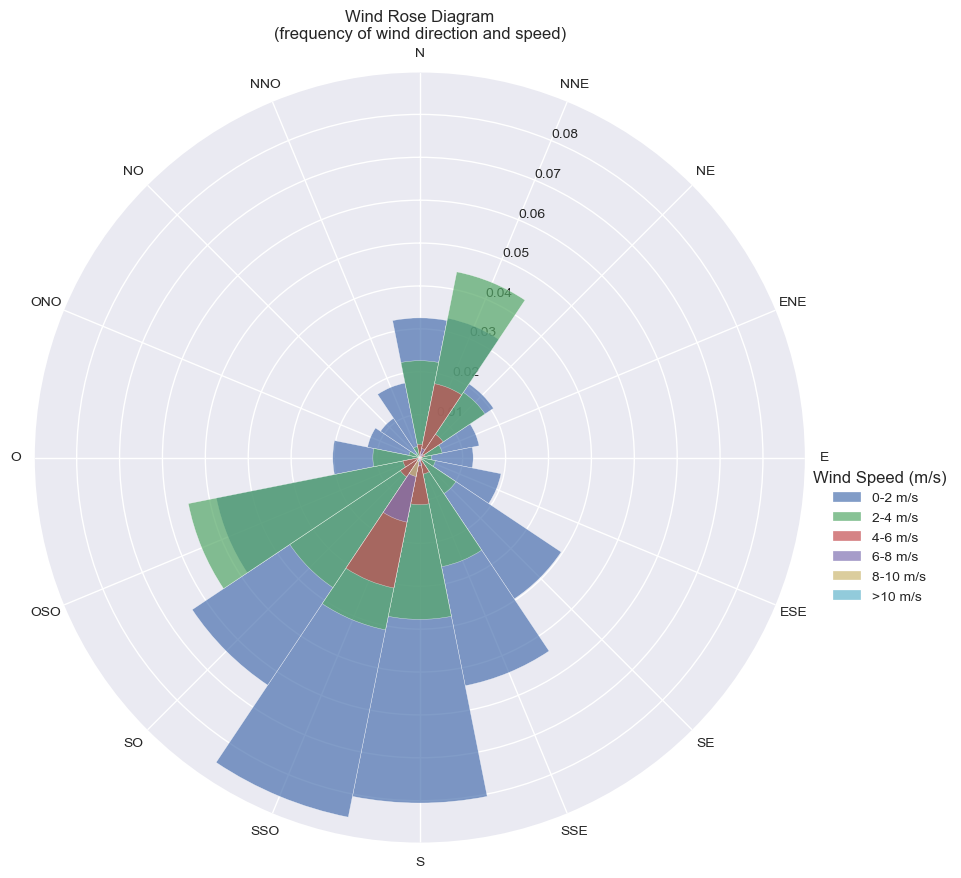

In [109]:
def create_wind_rose(df_in):
    """
    Create a wind rose diagram
    """
    df = df_in.copy()
    # Convert wind directions to radians
    wd_rad = np.radians(df['wd'])
    
    # Define wind speed bins
    speed_bins = [0, 2, 4, 6, 8, 10, np.inf]
    speed_labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '>10']
    
    # Create direction bins (16 compass directions)
    dir_bins = np.linspace(0, 2*np.pi, 17)
    dir_labels = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE',
                 'S', 'SSO', 'SO', 'OSO', 'O', 'ONO', 'NO', 'NNO']
    
    # Categorize wind speeds
    df['speed_cat'] = pd.cut(df['wv'], bins=speed_bins, labels=speed_labels)
    
    # Create figure
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='polar')
    
    # Plot each speed category
    for speed_label in speed_labels:
        mask = df['speed_cat'] == speed_label
        if mask.any():
            hist, _ = np.histogram(wd_rad[mask], bins=dir_bins)
            hist = hist / len(df)  # Convert to frequency
            width = dir_bins[1] - dir_bins[0]
            ax.bar(dir_bins[:-1], hist, width=width, bottom=0.0, 
                  label=f'{speed_label} m/s', alpha=0.7)
    
    # Customize the plot
    ax.set_theta_direction(-1)
    ax.set_theta_zero_location('N')
    ax.set_thetagrids(np.degrees(dir_bins[:-1]), dir_labels)
    ax.set_title('Wind Rose Diagram\n(frequency of wind direction and speed)')
    plt.legend(title='Wind Speed (m/s)', bbox_to_anchor=(1.2, 0.5))
    
    return fig
    
# Create separate wind rose plot
wind_rose_fig = create_wind_rose(df)

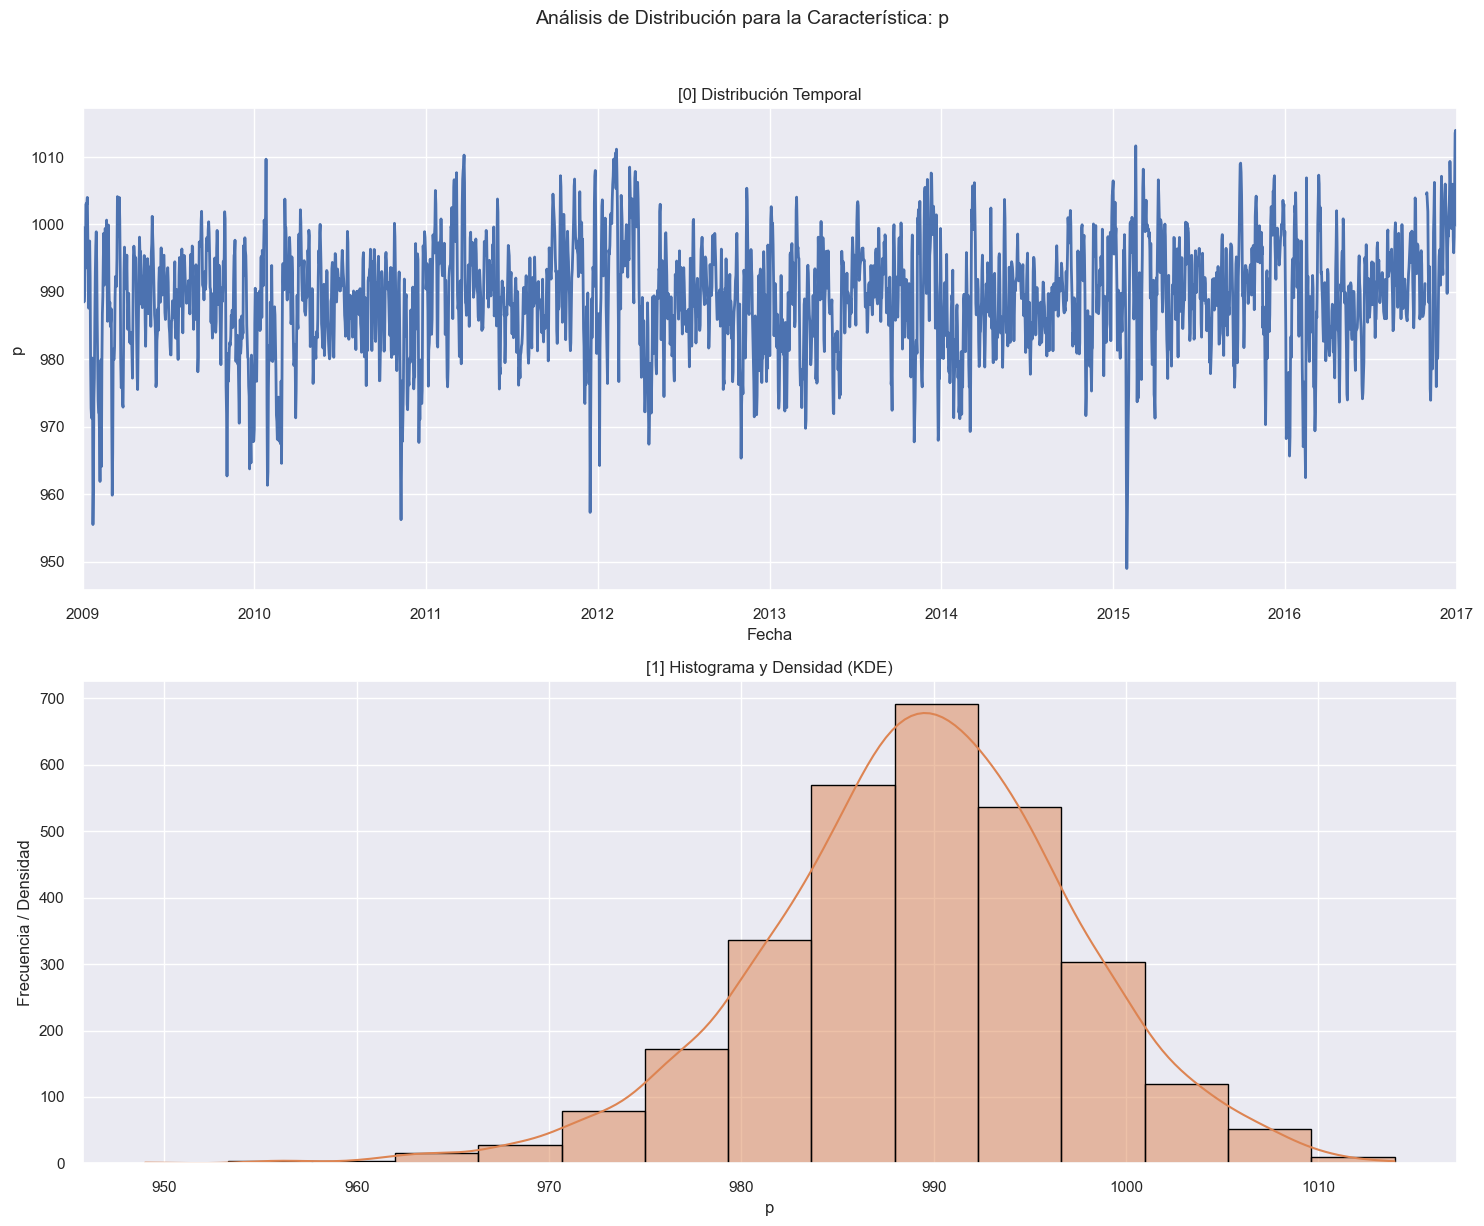

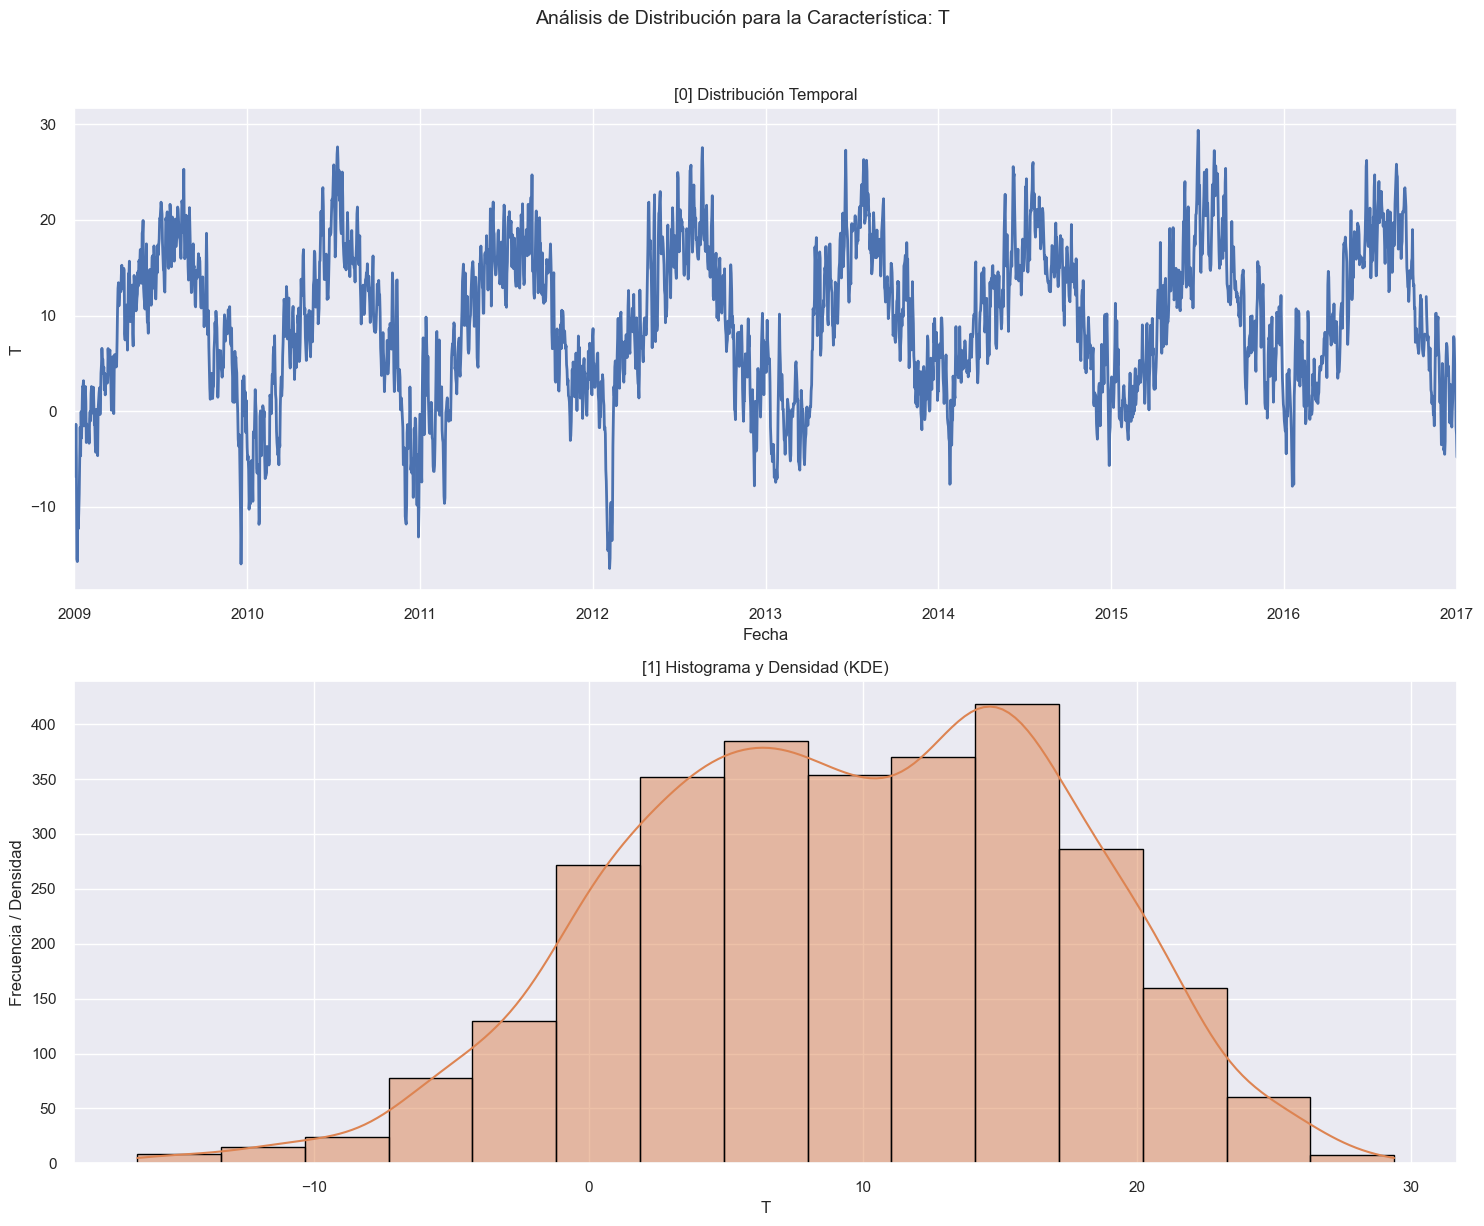

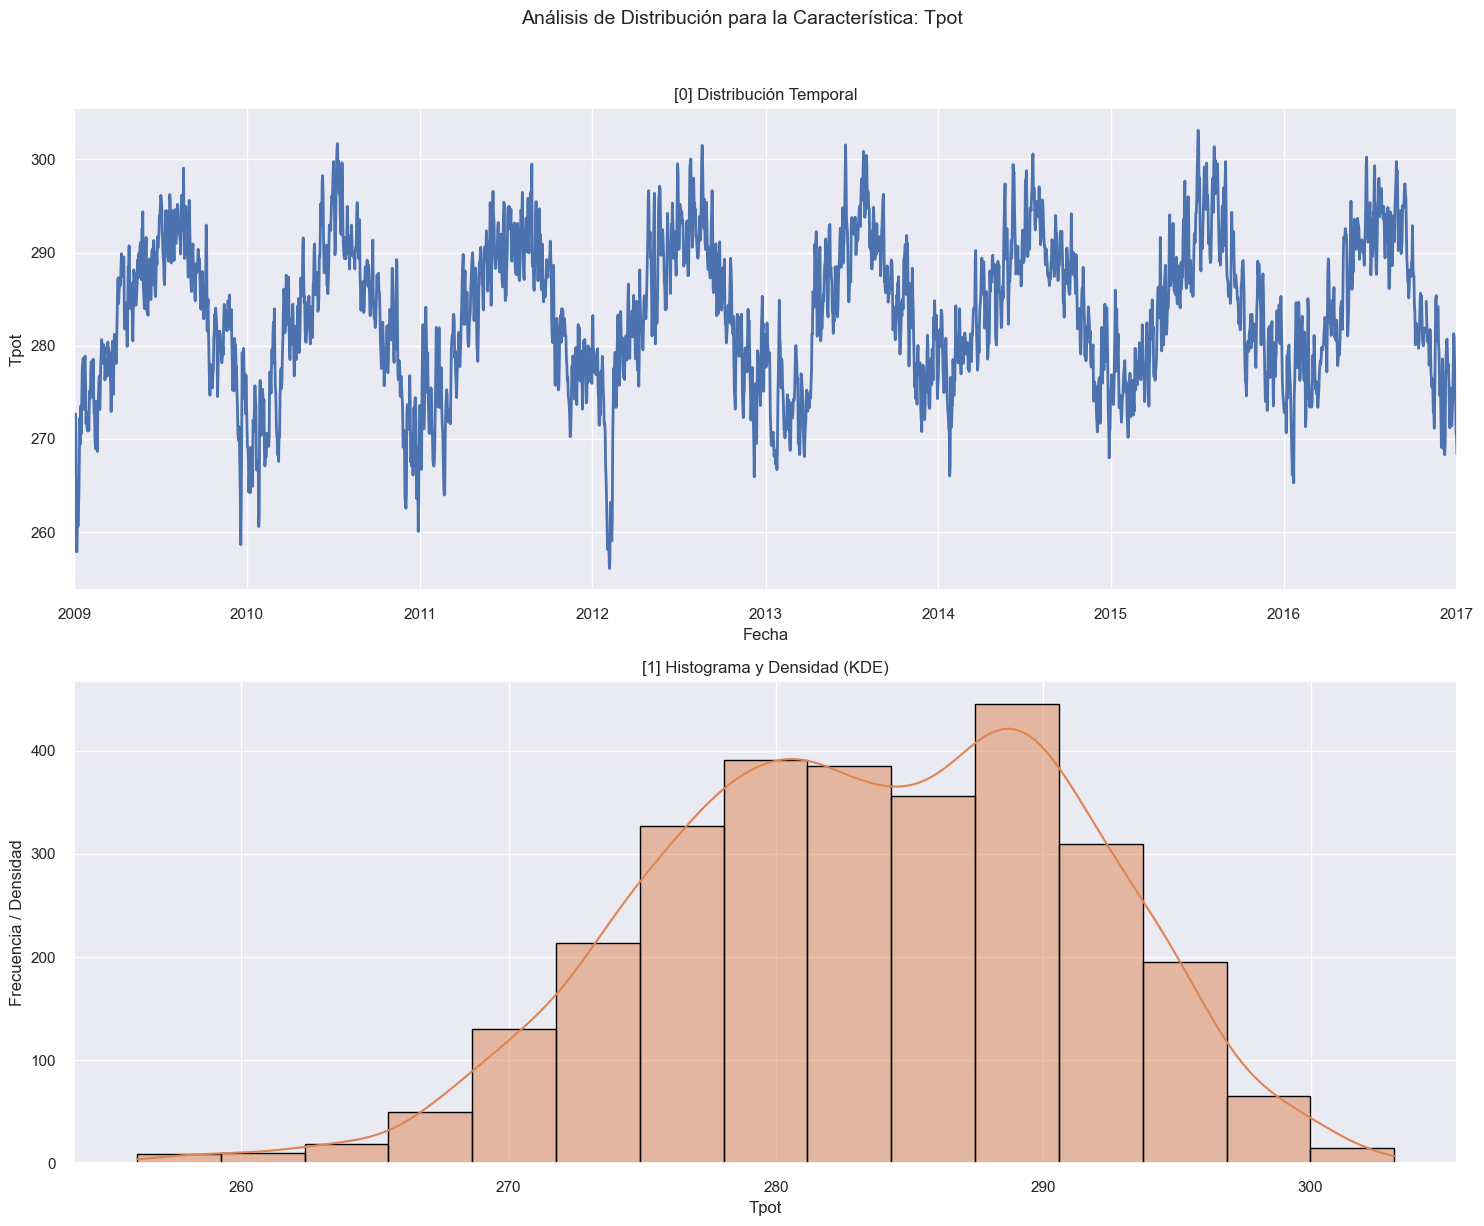

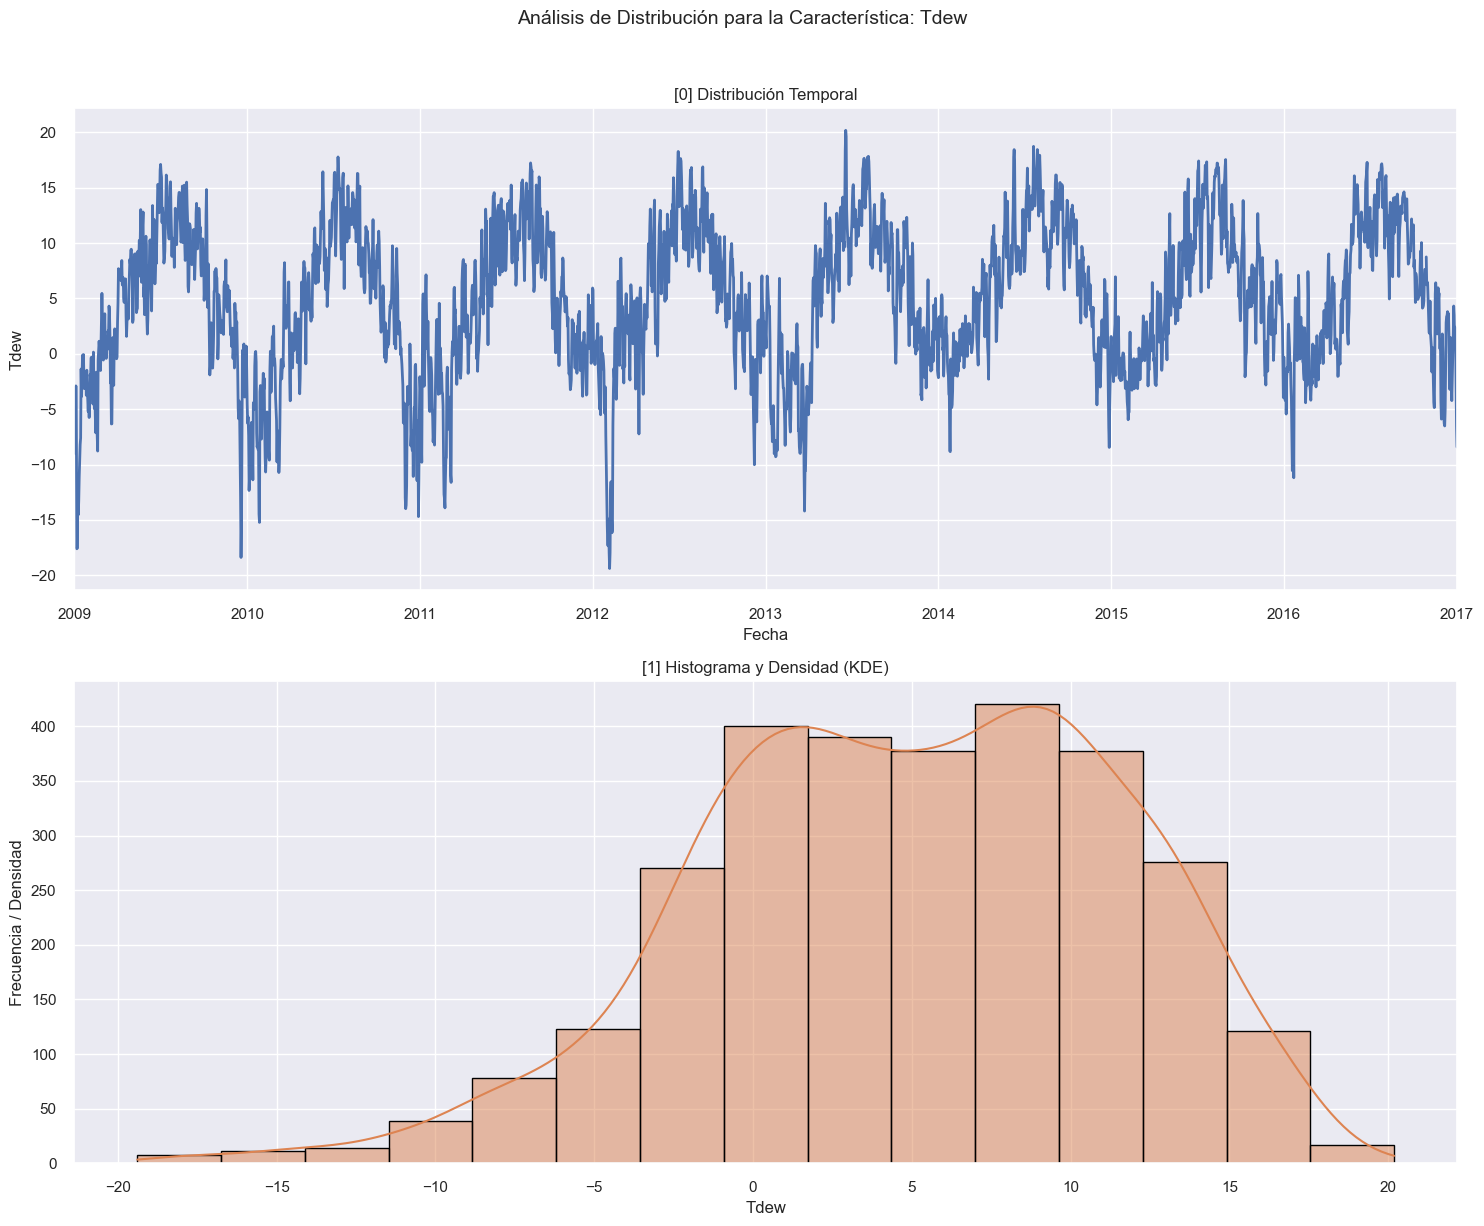

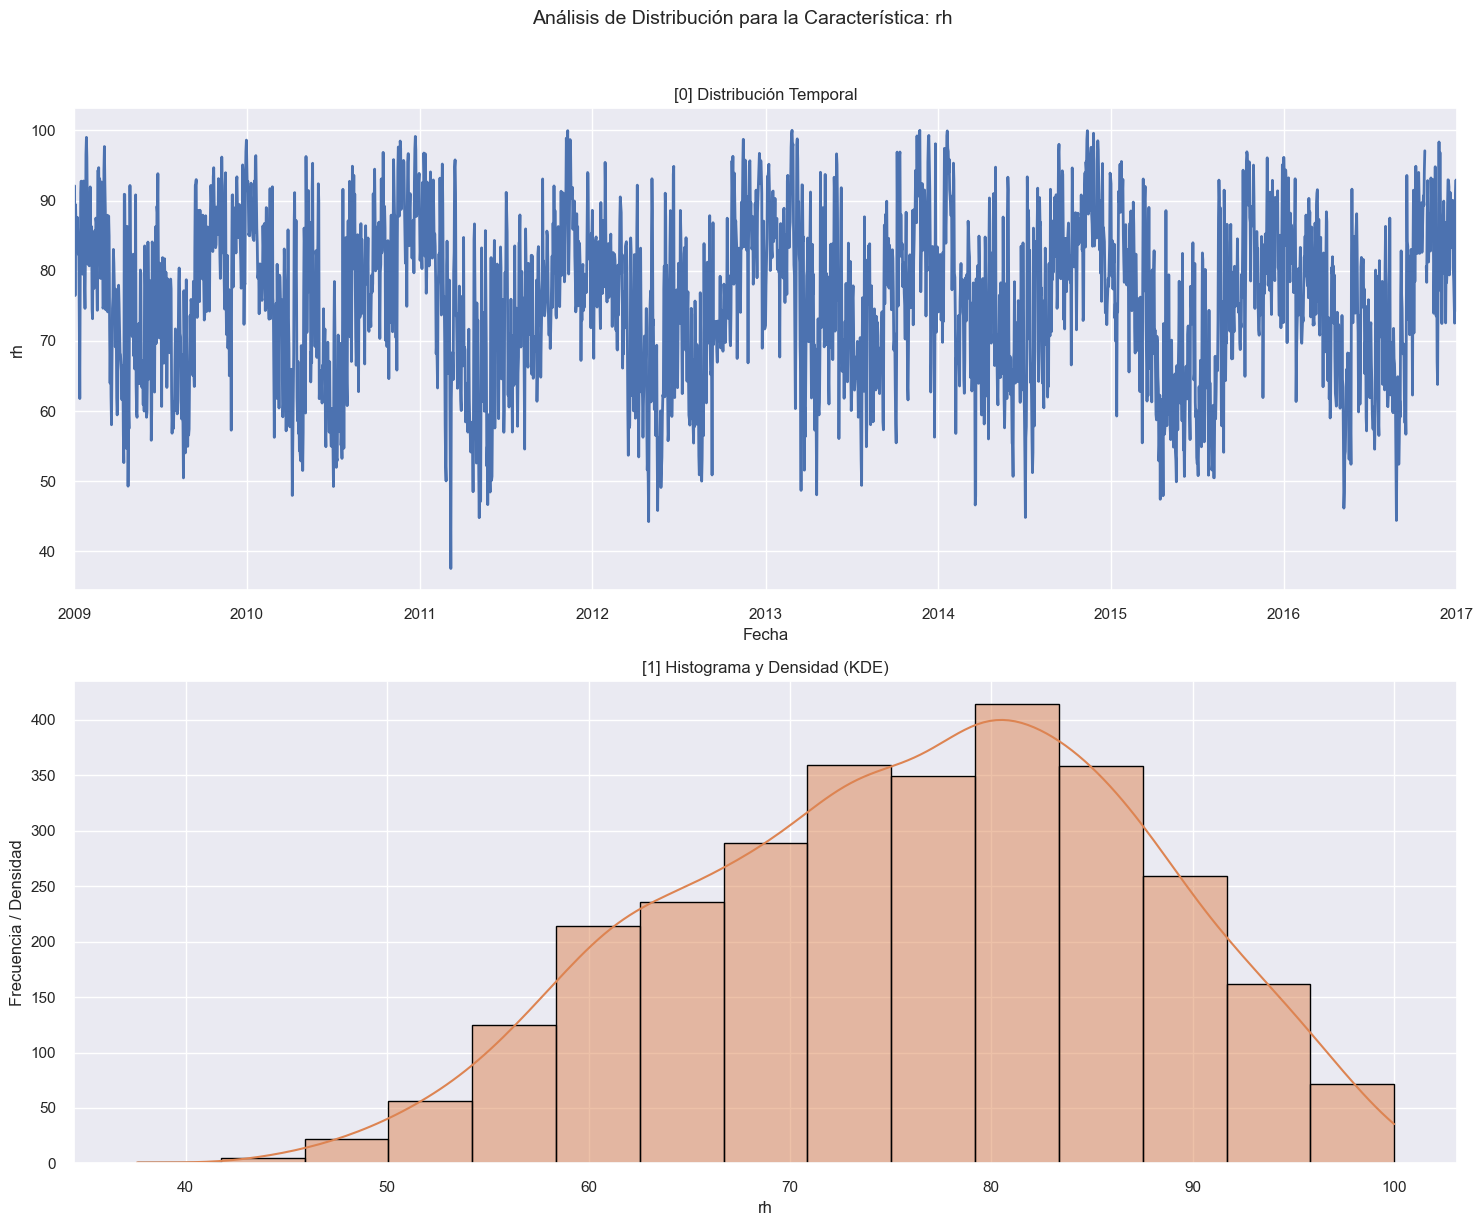

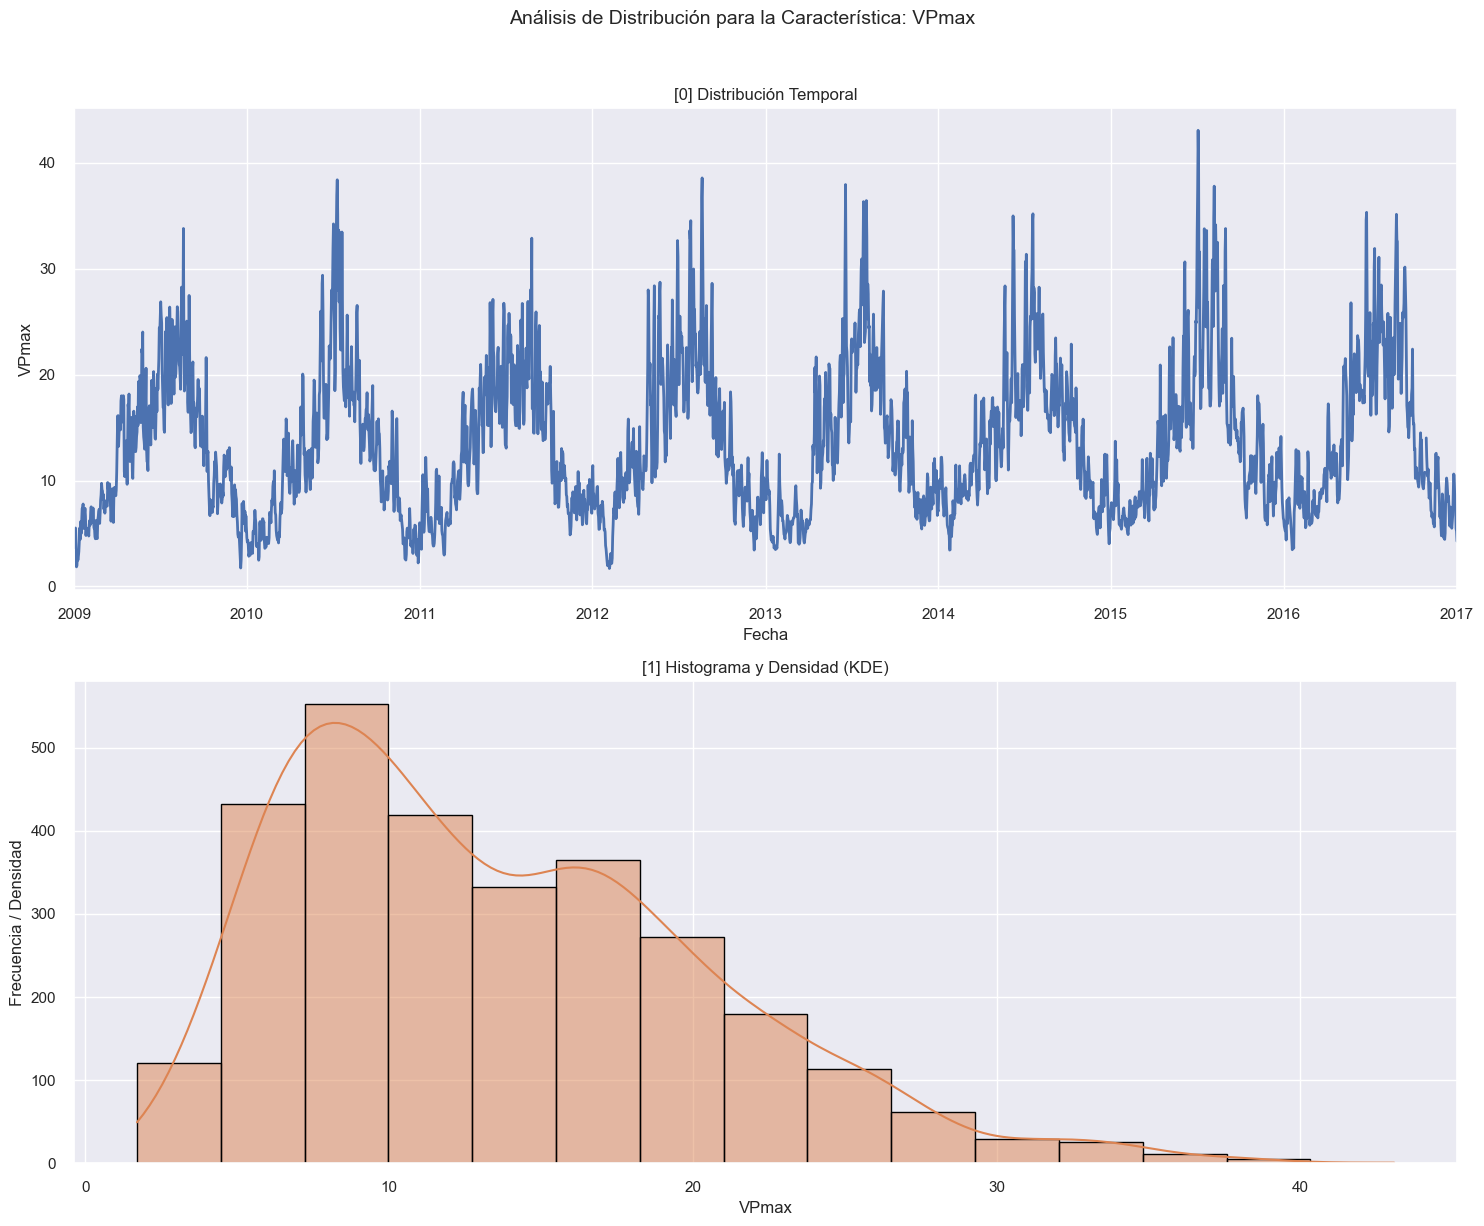

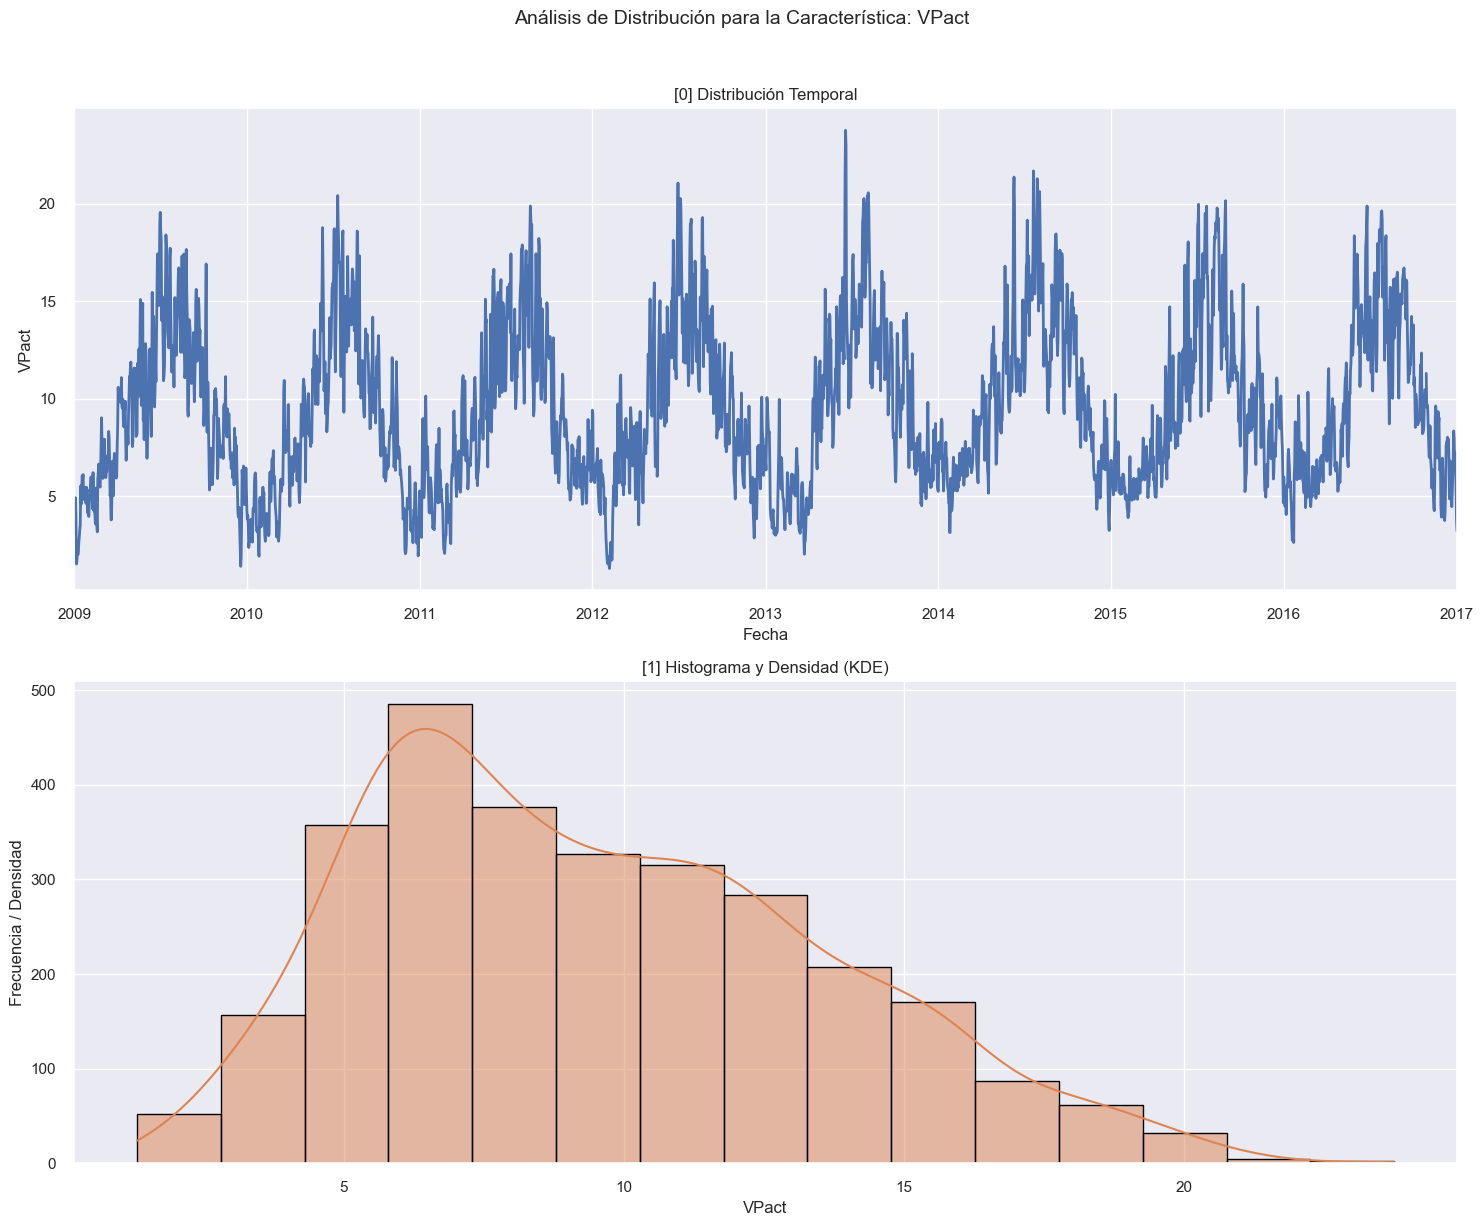

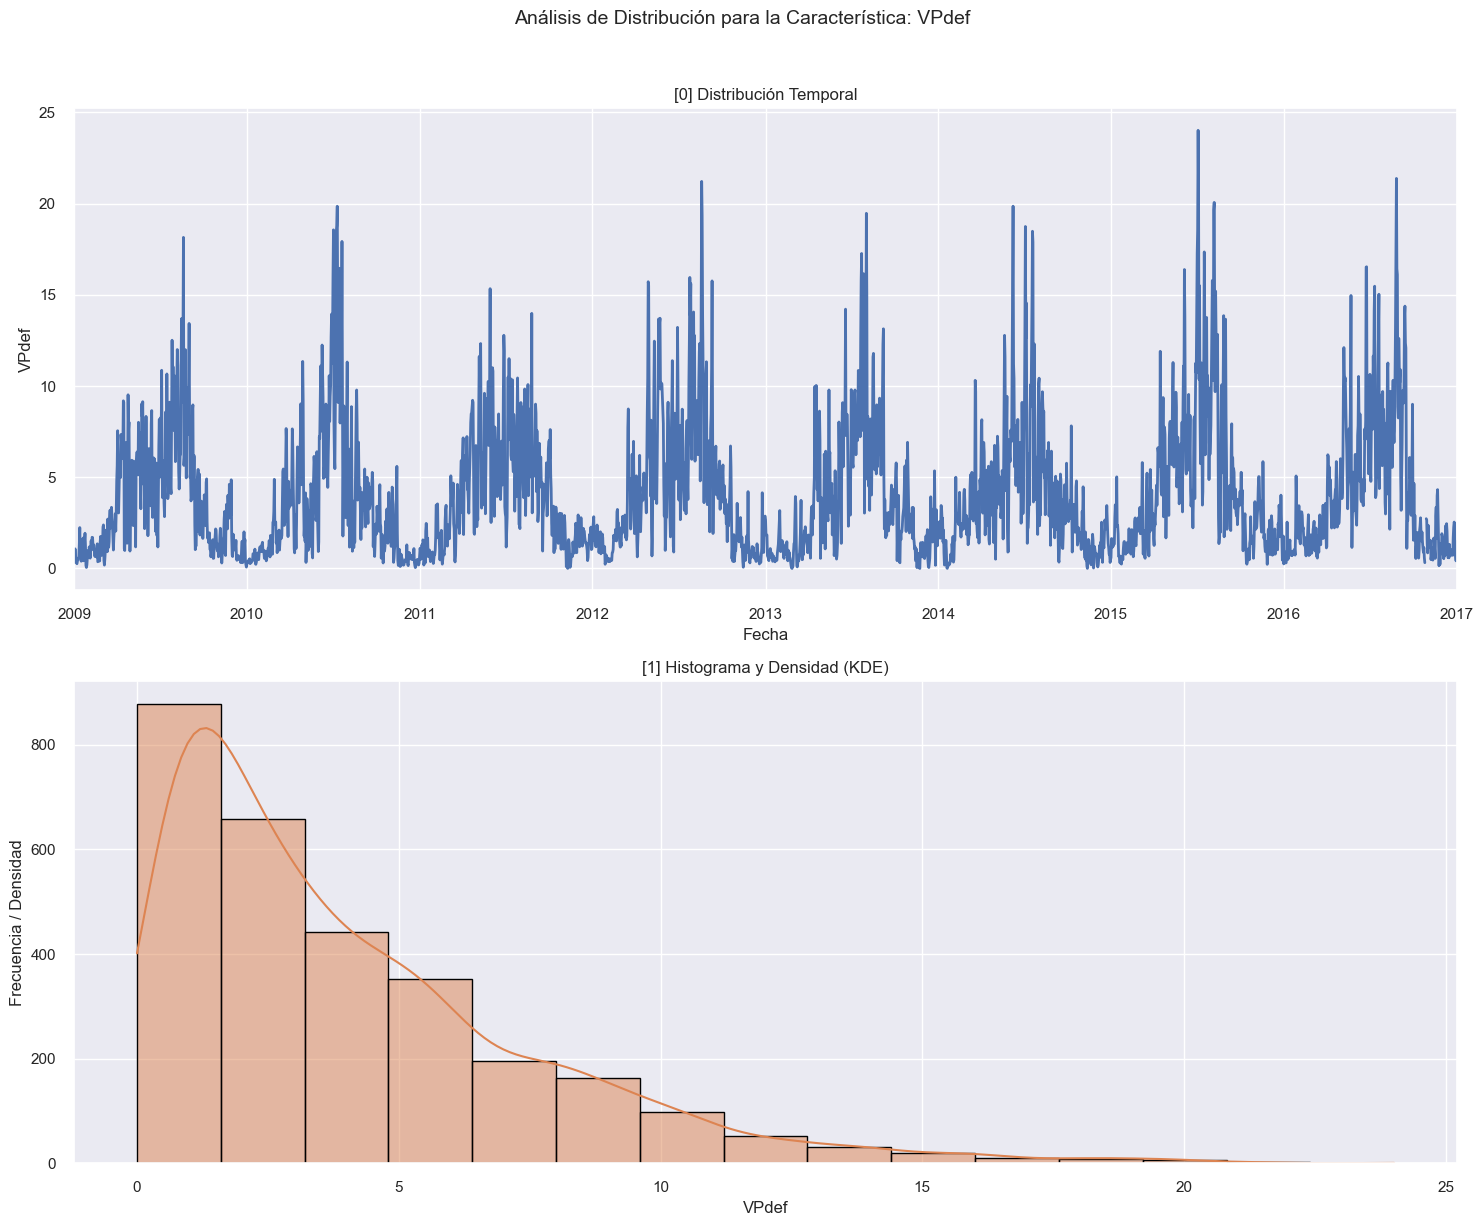

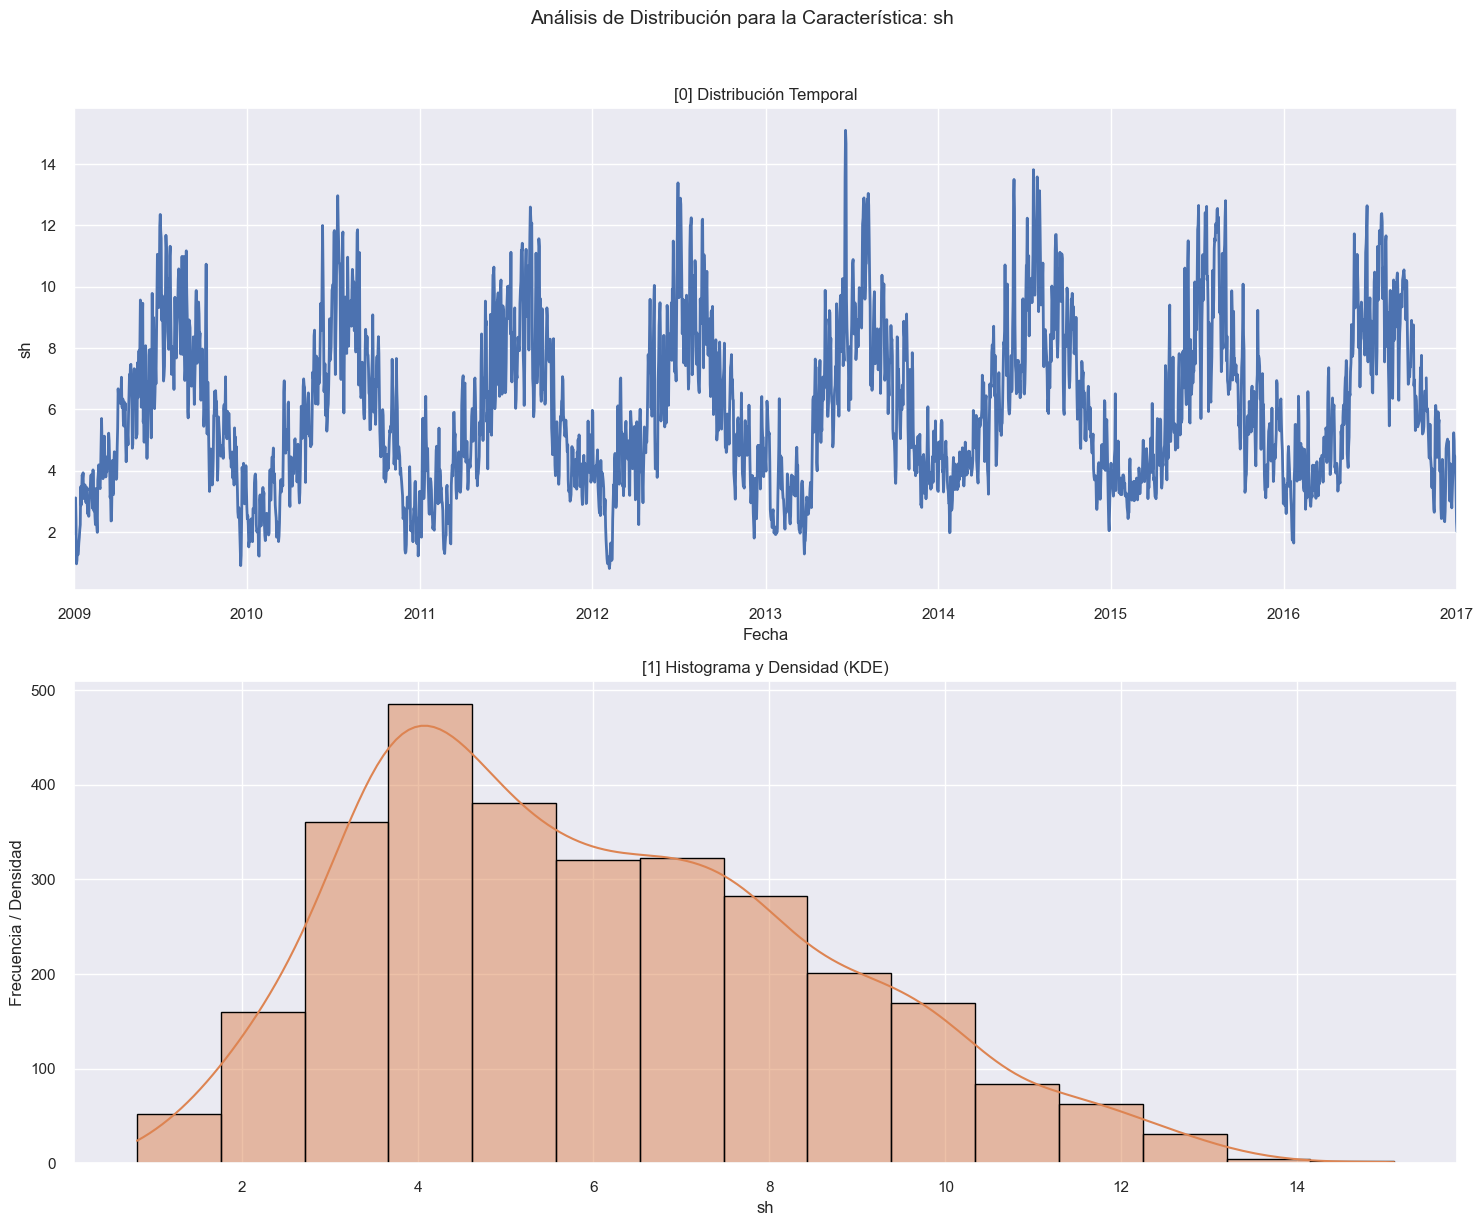

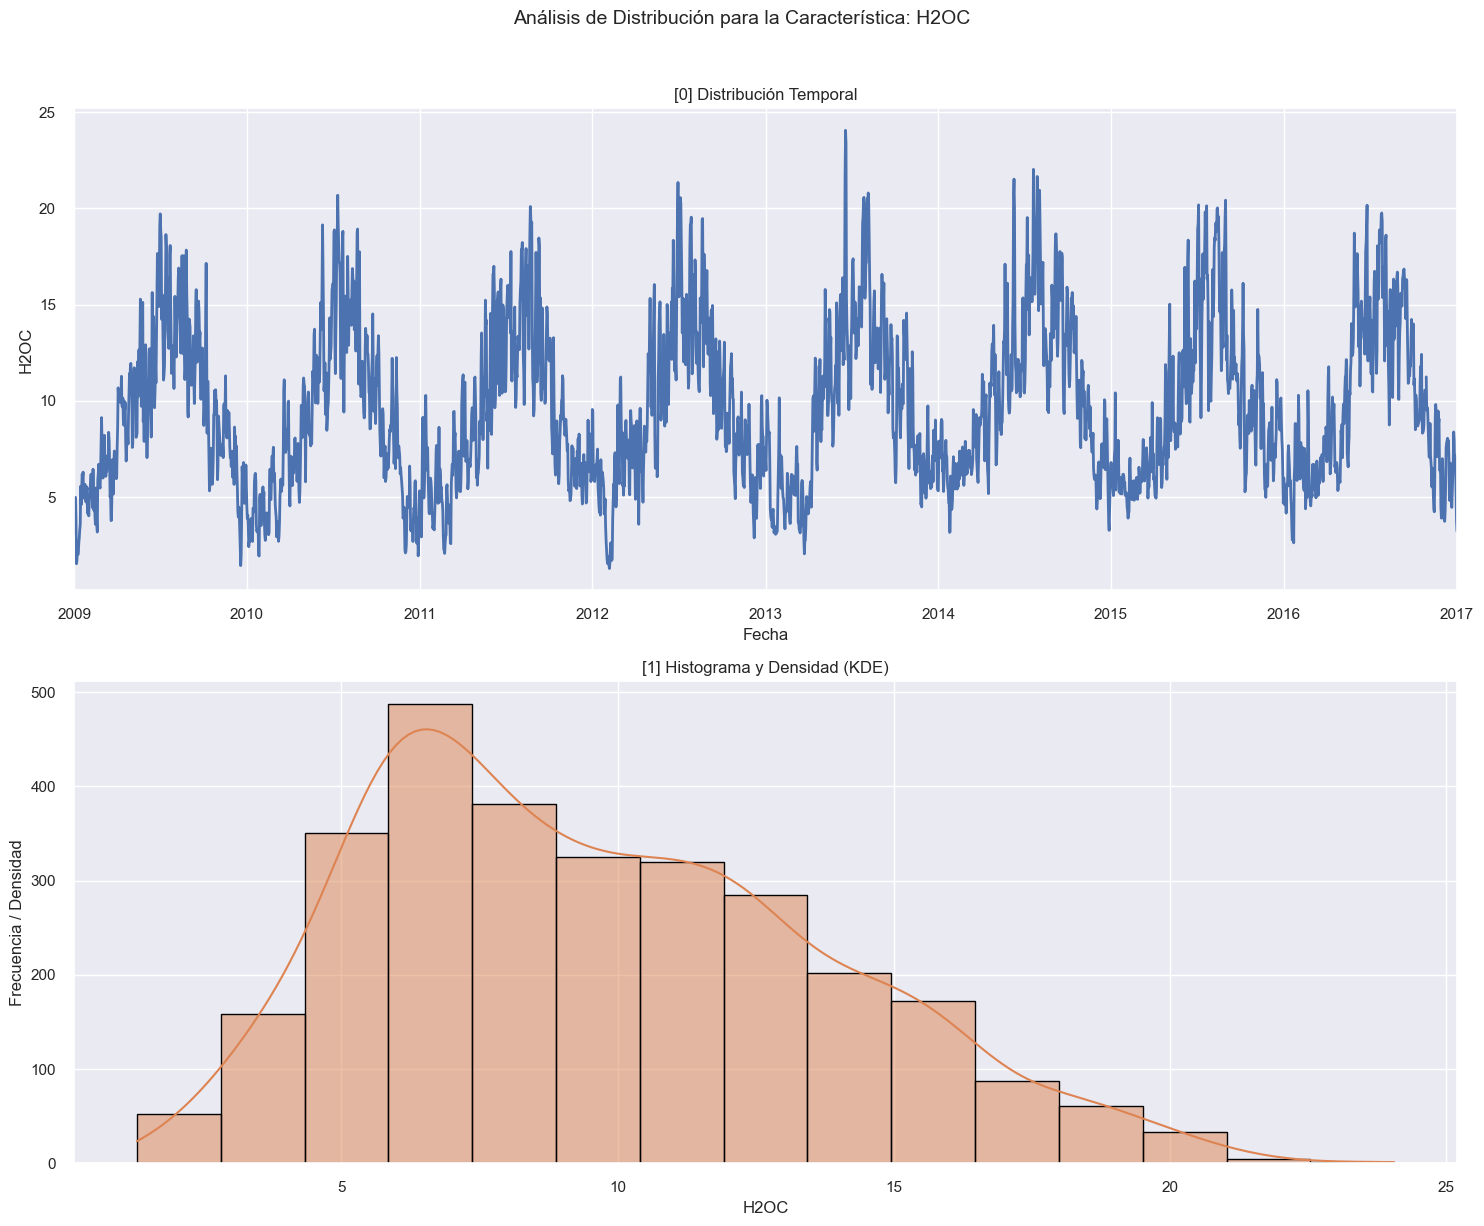

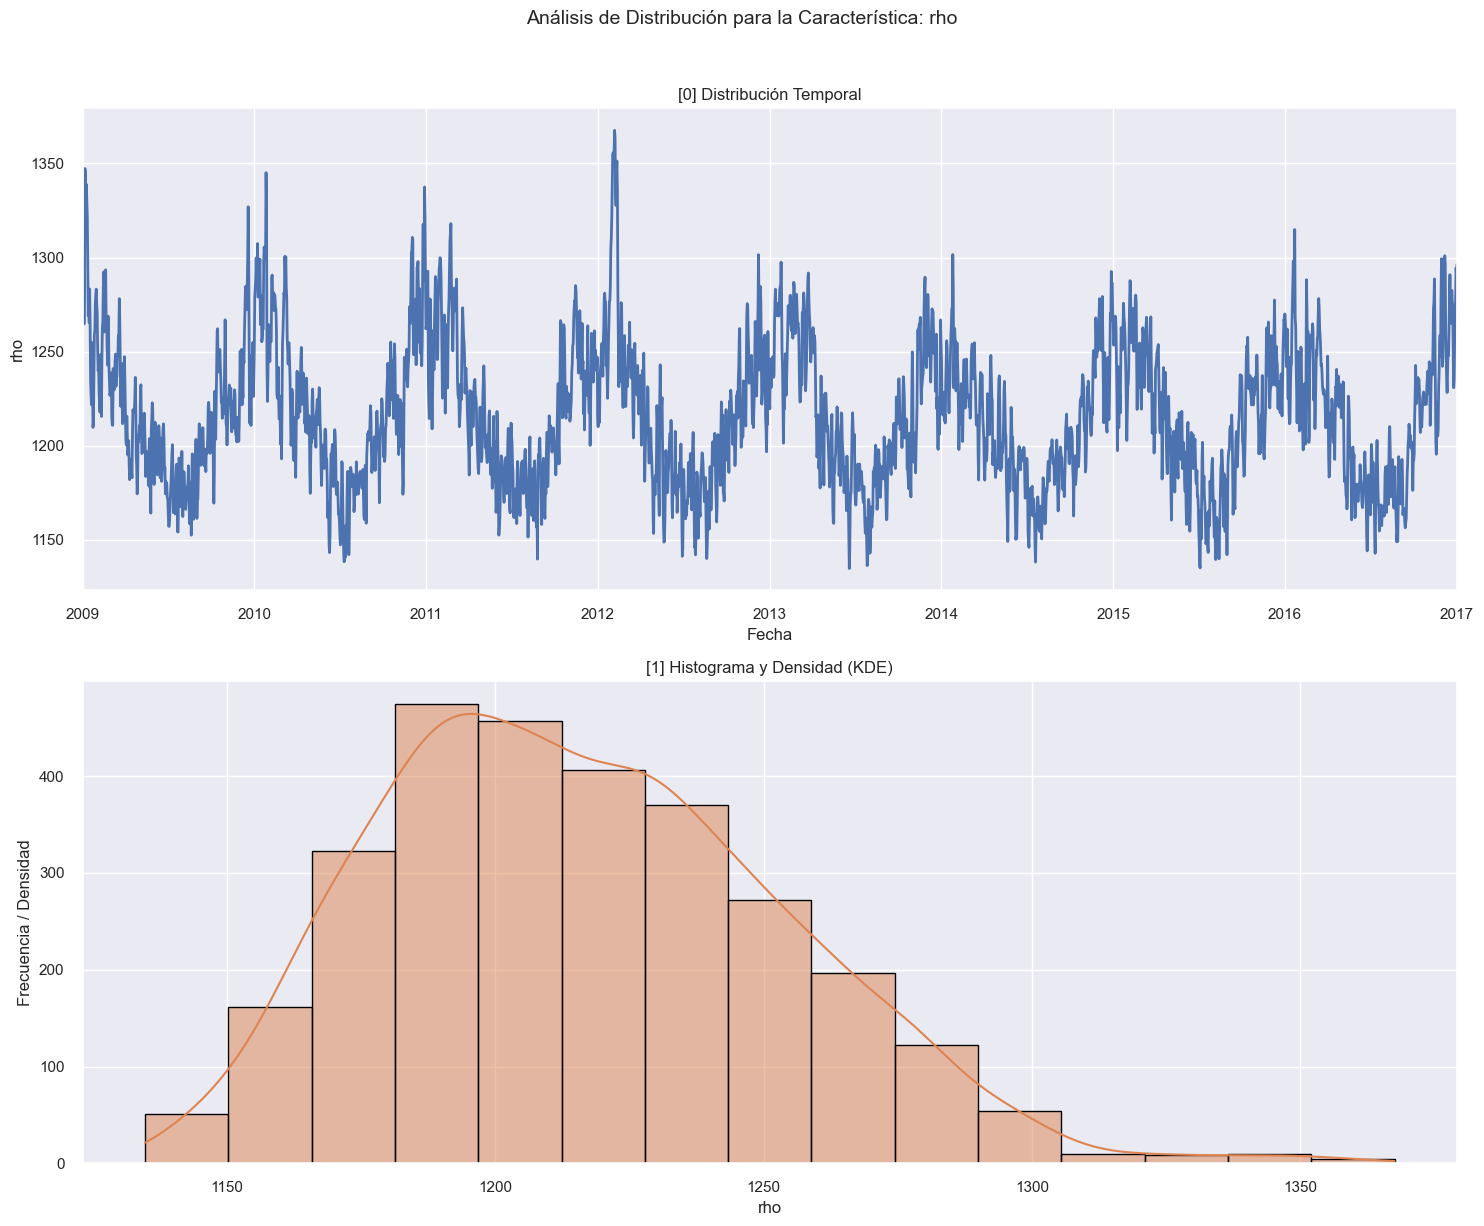

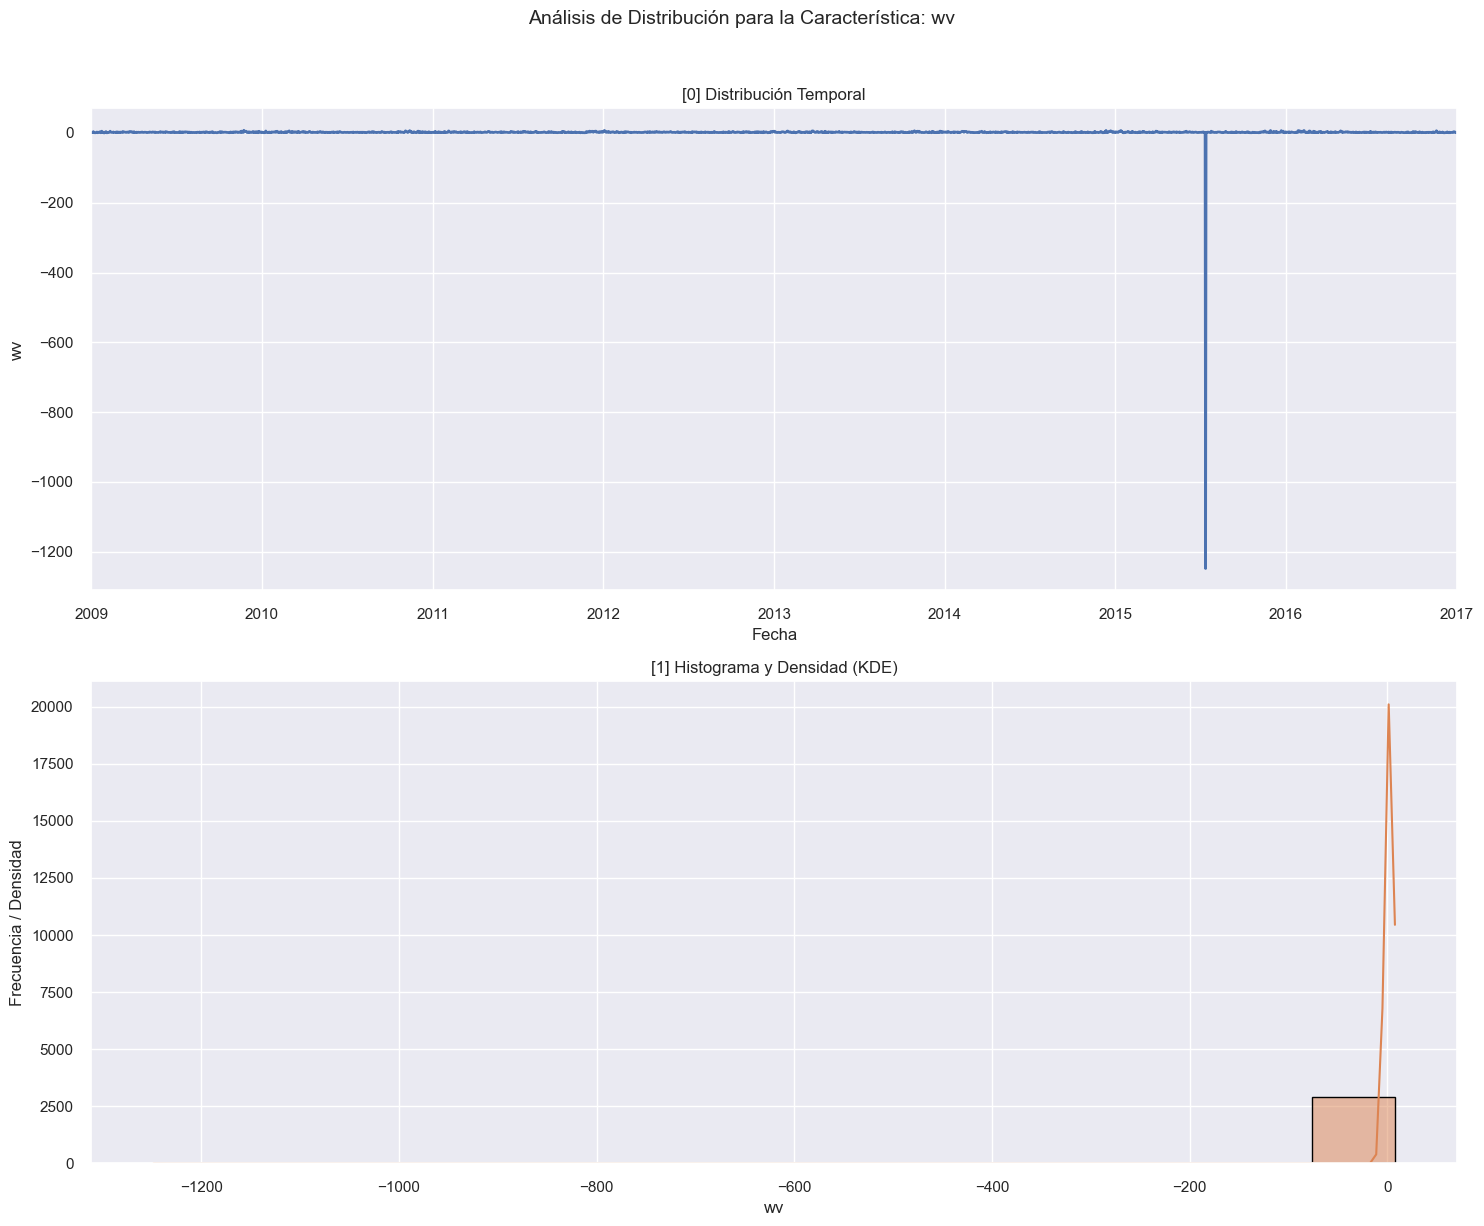

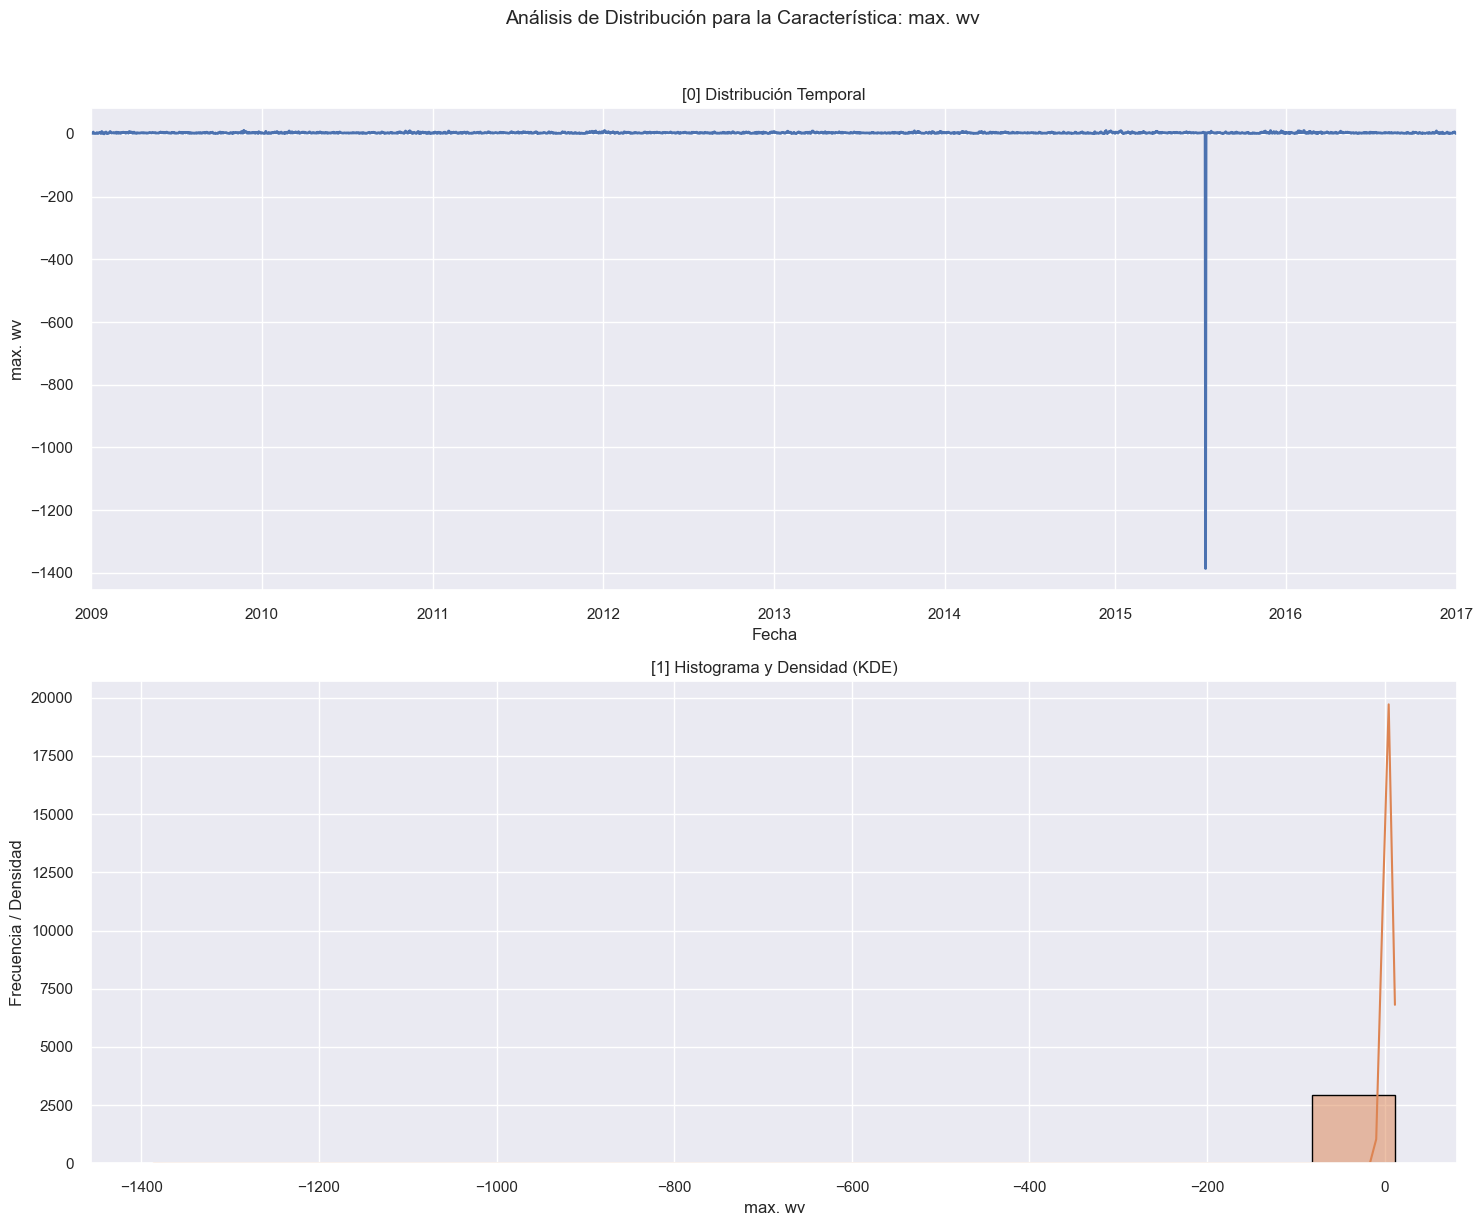

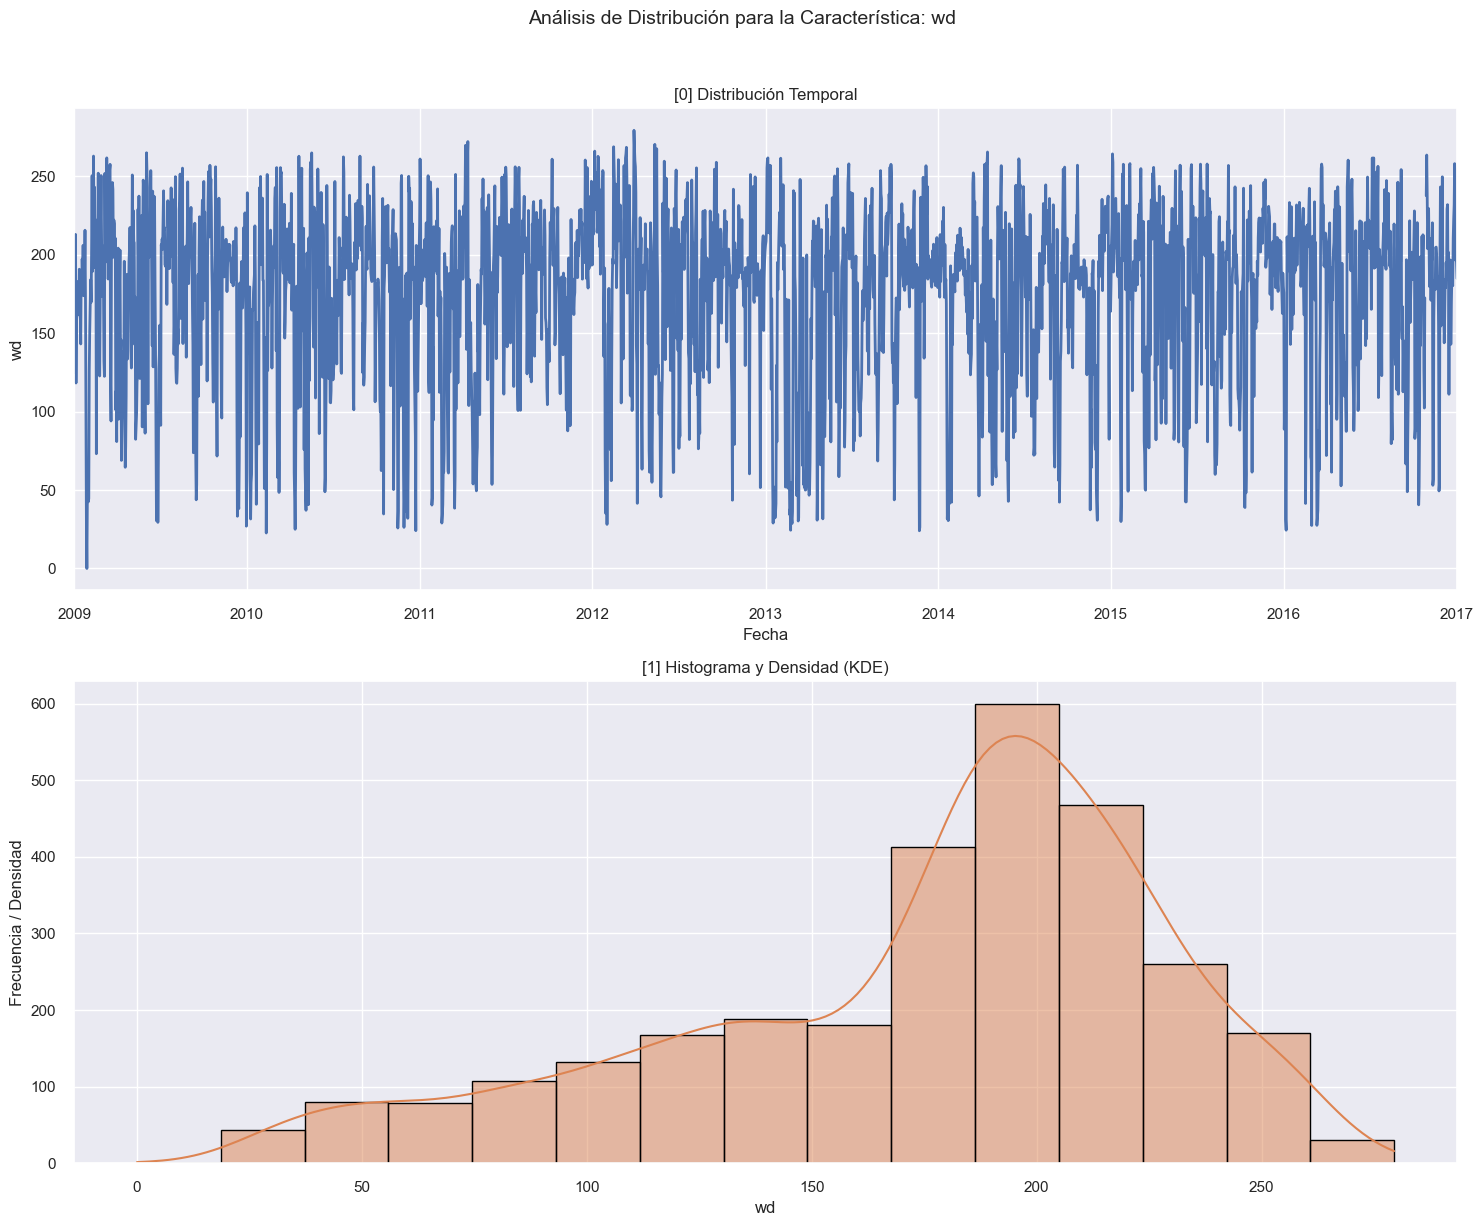

In [110]:
# Aplicar estilo Seaborn para gráficos más limpios
sns.set_theme(style="darkgrid") 

# 2. CICLO FOR PARA GENERAR SUBPLOTS 
for column in df_daily.columns:
    if column not in ['hour','day','month']:
        # Crear una figura con una fila y dos columnas (axs)
        fig, axs = plt.subplots(2, 1, figsize=(15, 12)) 
        
        # Establecer el título de la fila
        fig.suptitle(f'Análisis de Distribución para la Característica: {column}', fontsize=14, y=1.02)
        
        #  Columna 0: Distribución Temporal (Gráfico de Línea) 
        ax_time = axs[0]
        df_daily[column].plot(ax=ax_time, 
                        title='[0] Distribución Temporal', 
                        linewidth=2, 
                        color=sns.color_palette()[0]) # Usamos el azul primario
        ax_time.set_xlabel('Fecha')
        ax_time.set_ylabel(column)
        
        #  Columna 1: Distribución Probabilística (Histograma con KDE) 
        ax_hist = axs[1]
        # Usamos sns.histplot para incluir la curva de densidad (KDE) junto al histograma.
        sns.histplot(df_daily[column], 
                    ax=ax_hist, 
                    kde=True, 
                    bins=15, 
                    color=sns.color_palette()[1], # Usamos el naranja secundario
                    edgecolor='black') 
        ax_hist.set_title('[1] Histograma y Densidad (KDE)')
        ax_hist.set_xlabel(column)
        ax_hist.set_ylabel('Frecuencia / Densidad')
        
        # Ajustar el diseño para evitar que los títulos y etiquetas se solapen
        plt.tight_layout()
        plt.show()

## Análisis de Correlación

Se busca establecer la correlación de las distintas variables entre sí y con la variable target, a fin de realizar posteriormente la selección de features con los mejores predictores para entrenar un modelo multivariado.

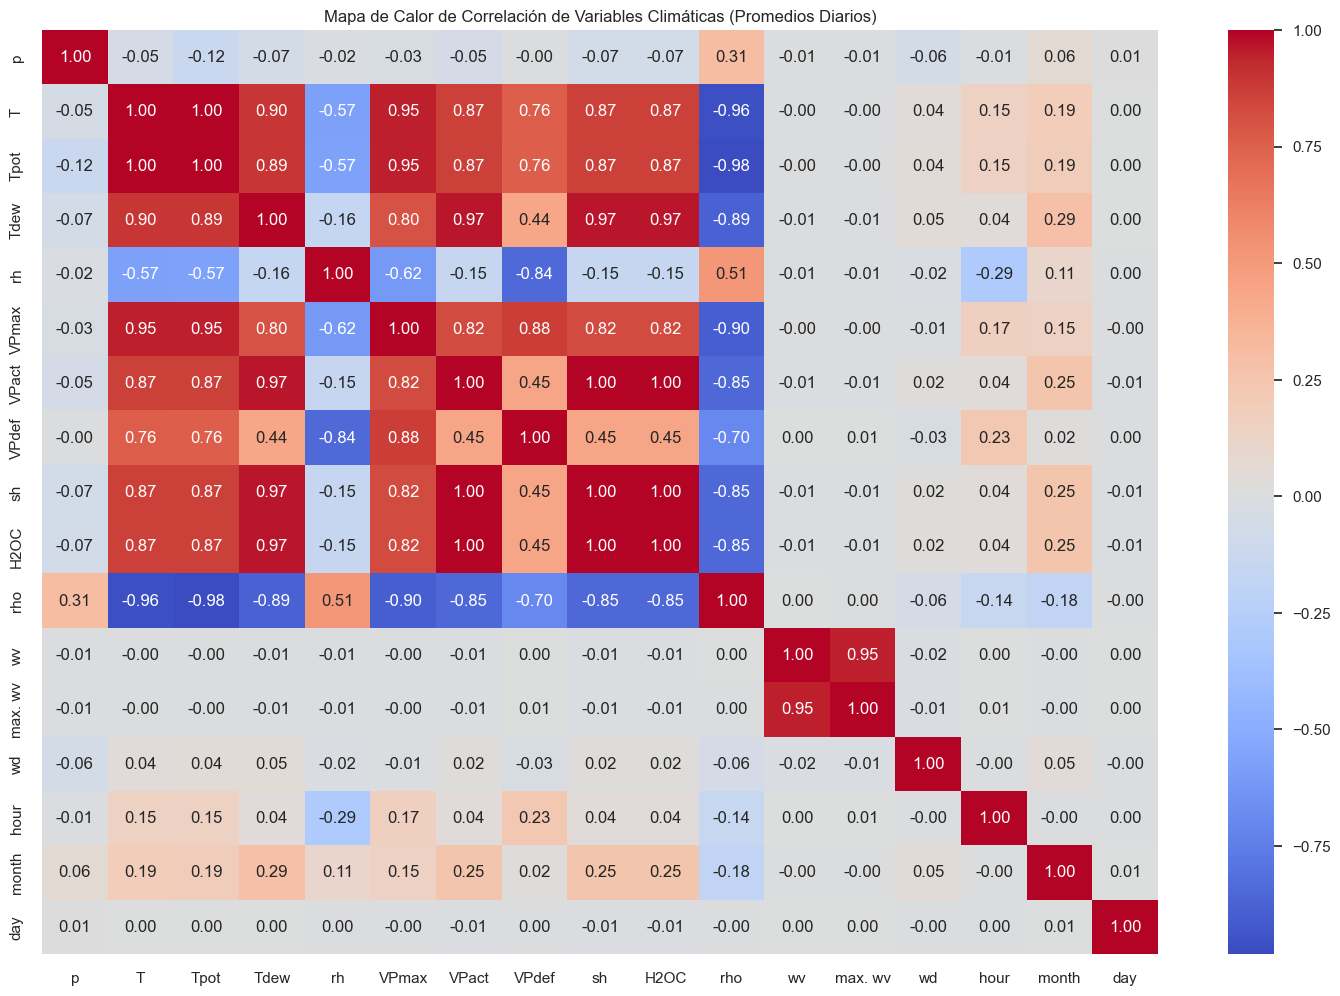

In [111]:
# Calcula la matriz de correlación
correlation_matrix = df.corr()

# Crea el mapa de calor
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación de Variables Climáticas (Promedios Diarios)')
plt.show()

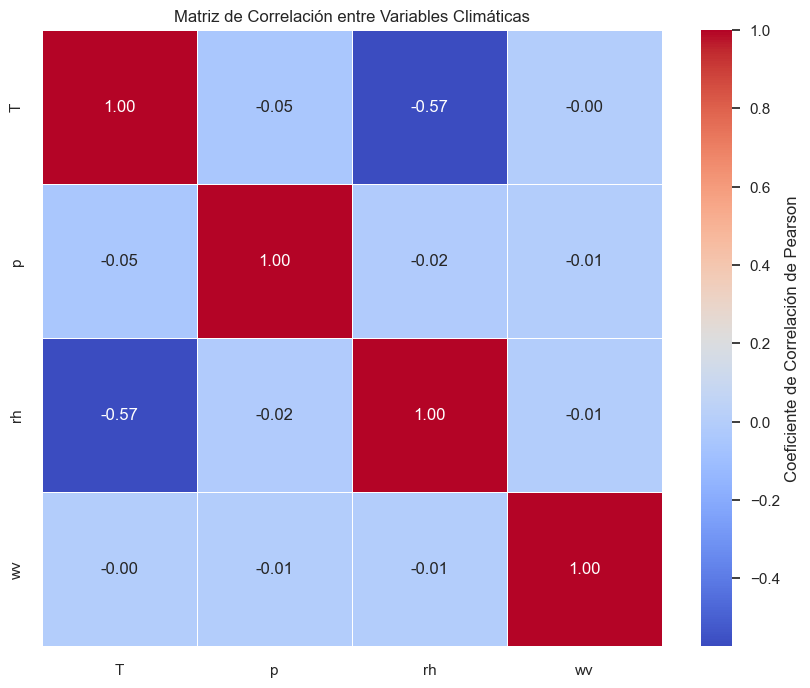

In [112]:
#  1. Seleccionar las variables y calcular la matriz de correlación 

# Definir la lista de columnas de interés
variables_interes = ['T', 'p', 'rh', 'wv']

# Crear un sub-DataFrame solo con estas columnas
df_subset = df[variables_interes]

# Calcular la matriz de correlación de Pearson
small_cm = df_subset.corr()

#  2. Generar el Mapa de Calor 
plt.figure(figsize=(10, 8))

sns.heatmap(
    small_cm,
    annot=True,     # Muestra el valor del coeficiente de correlación en cada celda
    cmap='coolwarm',# Paleta de color (coolwarm es excelente para mostrar positivos/negativos)
    fmt=".2f",      # Formato con dos decimales
    linewidths=.5,  # Líneas para separar las celdas
    cbar_kws={'label': 'Coeficiente de Correlación de Pearson'}
)

plt.title('Matriz de Correlación entre Variables Climáticas')
plt.show()

In [113]:
features_dict = {
    'T': 'Temperatura',
    'p': 'Presión',
    'rh': 'Humedad rel.',
    'wv': 'Viento',
    # 'rain': 'Lluvia',
    # 'SWDR': 'Radiación'
    }

In [114]:
# # Visualiza los datos en formato texto
# for i, var in enumerate(variables_interes):
#     correlation_series = correlation_matrix[var].sort_values(ascending=False)
#     print(f"{var}:")
#     print(correlation_series[1:],end="\n\n")

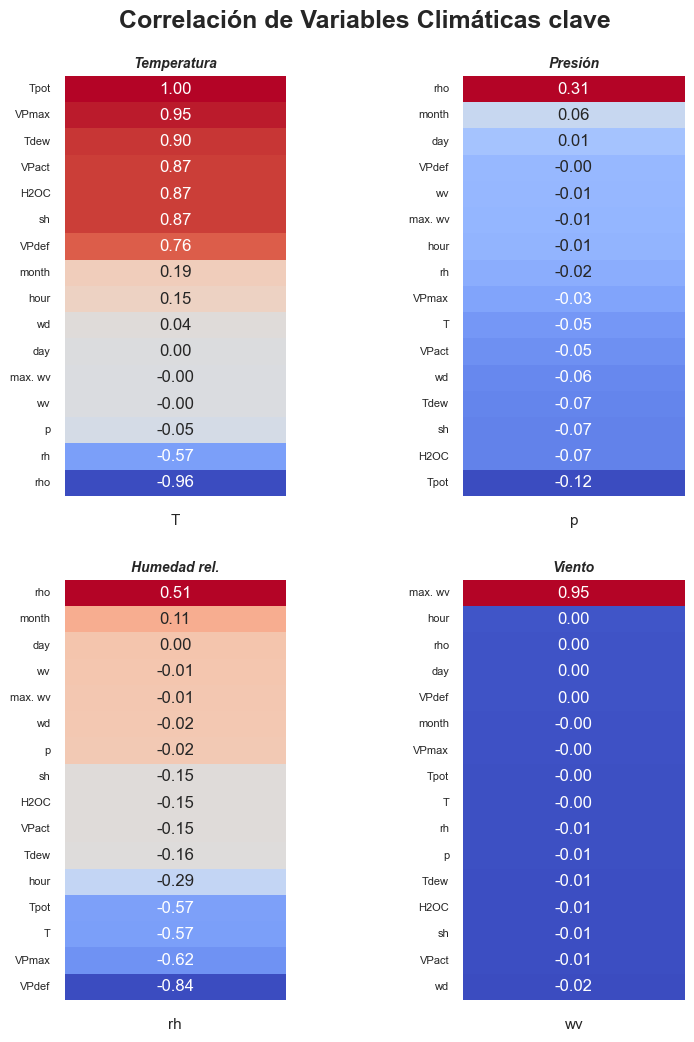

In [115]:
fig, axes = plt.subplots(2, 2, figsize=(8, 12), sharey=False)  
plt.subplots_adjust(wspace=0.8, hspace=0.2) 

# Itera sobre las variables
for i, var in enumerate(variables_interes):
    
    # Selecciona la columna de correlación y ordenarla
    correlation_series = correlation_matrix[var].sort_values(ascending=False)
    
    # Convierte la Serie a un DataFrame de una sola columna (necesario para sns.heatmap)
    correlation_df = correlation_series.to_frame(name=f'{var}')
    
    # Selecciona el subplot actual
    ax_h, ax_v = i // 2 , i % 2
    ax = axes[ax_h, ax_v]

    # Genera el Mapa de Calor en el subplot
    sns.heatmap(
        correlation_df[1:],
        ax=ax,          
        annot=True,     
        cmap='coolwarm',
        fmt=".2f",
        cbar=False,
    )
    
    # Configura Título y Etiquetas
    ax.set_title(
        f'{features_dict[var]}', 
        fontsize=10, 
        fontweight='bold',
        fontstyle='italic'
    ) 
    ax.set_xlabel('')
    ax.tick_params(axis='y', labelsize=8, length=3) 

# Título general de la figura
fig.suptitle('Correlación de Variables Climáticas clave', fontsize=18, fontweight='bold', y=0.935)

plt.show()

#### Observaciones
1. **Features descorrelacionadas ($|R|$ < 0.07):** podemos notar es que las siguientes son independientes de las demás variables registradas:
    * **Velocidad del Viento (`wv`, `max. wv`):** Es prácticamente independiente de las demás variables meteorológicas principales (T, p, rh) y de las features de tiempo. El valor absoluto de su correlación con estas variables no supera **0.01** (a excepción de wd con R ≈ -0.015).
    * **Presión Atmosférica (`p`):** No muestra correlaciones fuertes ni moderadas con ninguna variable. Su correlación máxima es débil con la Densidad (`rho`, R ≈ 0.307) y con la Temperatura Potencial (`Tpot`, R ≈ -0.124).

2. **Features poco correlacioandas (0.07 ≤ $|R|$ <  0.8):**
    * **Humedad Relativa (`rh`):** La humedad relativa tiene una correlación fuerte/moderada solo con las variables de temperatura y déficit de humedad:
        * **Moderada Negativa:** Temperatura (**`T`**) y Temperatura Potencial (**`Tpot`**), con R ≈ -0.57.
        * **Fuerte Negativa:** Déficit de Presión de Vapor (**`VPdef`**), con un $|R|$ cercano a 0.84.
    * **Densidad del Aire (`rho`):** Presenta una correlación moderada positiva con la Humedad Relativa (**`rh`**) (R ≈ 0.51) y una débil positiva con la Presión (**`p`**) (R ≈ 0.307).
    
3. **Features muy correlacioandas:** La mayor colinealidad se encuentra dentro del grupo de variables de temperatura y humedad absoluta.

    * **Correlación Perfecta/Muy Fuerte ($|R|$ ≥ 0.95):**
        * Temperatura (`T`) vs. Temperatura Potencial (`Tpot`): R ≈ **0.997**. (Son casi idénticas; se puede eliminar una.)
        * Temperatura (`T`) vs. Presión Máxima de Vapor (`VPmax`): R ≈ **0.951**. (VPmax se calcula directamente a partir de T.)

    * **Correlación Fuerte (0.8 ≤ $|R|$ < 0.95):**
        * Temperatura (`T`) vs. Densidad del Aire (**`rho`**): R ≈ **-0.963**. (Correlación negativa muy fuerte: a mayor temperatura, menor densidad.)
        * Temperatura (`T`) vs. Temperatura de Punto de Rocío (**`Tdew`**): R ≈ 0.896.
        * Todas las Medidas de Humedad Absoluta (`VPact`, `H2OC`, `sh`) tienen una correlación fuerte entre ellas y con `T` y `Tdew`.

## Estacionalidad de las series

### Temperatura

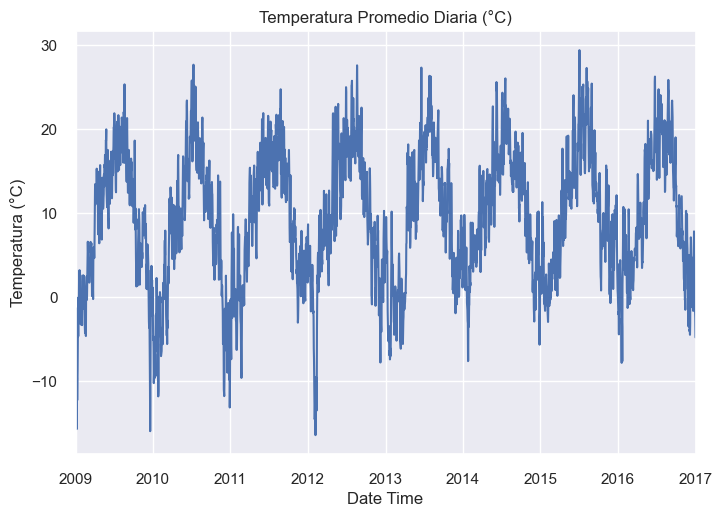

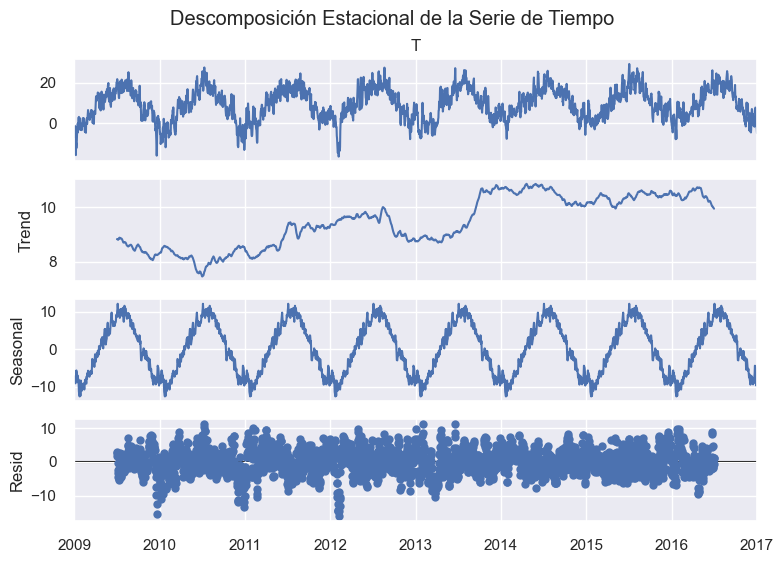

In [49]:
# Usando 'period=365' ya que los datos son diarios y la estacionalidad es anual
periodo_anual = 365

# Visualizar la serie de tiempo diaria
df_daily['T'].plot(title='Temperatura Promedio Diaria (°C)')
plt.ylabel('Temperatura (°C)')
plt.show()

# Descomposición estacional para observar tendencia, estacionalidad y residuos
# decomposition = sm.tsa.seasonal_decompose(df_daily['T'], model='additive')
decomposition = sm.tsa.seasonal_decompose(
    df_daily['T'].dropna(), 
    model='additive', 
    period=periodo_anual  # ¡Añade este argumento!
)
fig = decomposition.plot()
plt.suptitle('Descomposición Estacional de la Serie de Tiempo', y=1.02)
plt.show()

# Ejemplo para la división de datos:
split_index = int(len(df_daily) * 0.8)
train_data = df_daily.iloc[:split_index]
test_data = df_daily.iloc[split_index:]

### Velocidad del viento

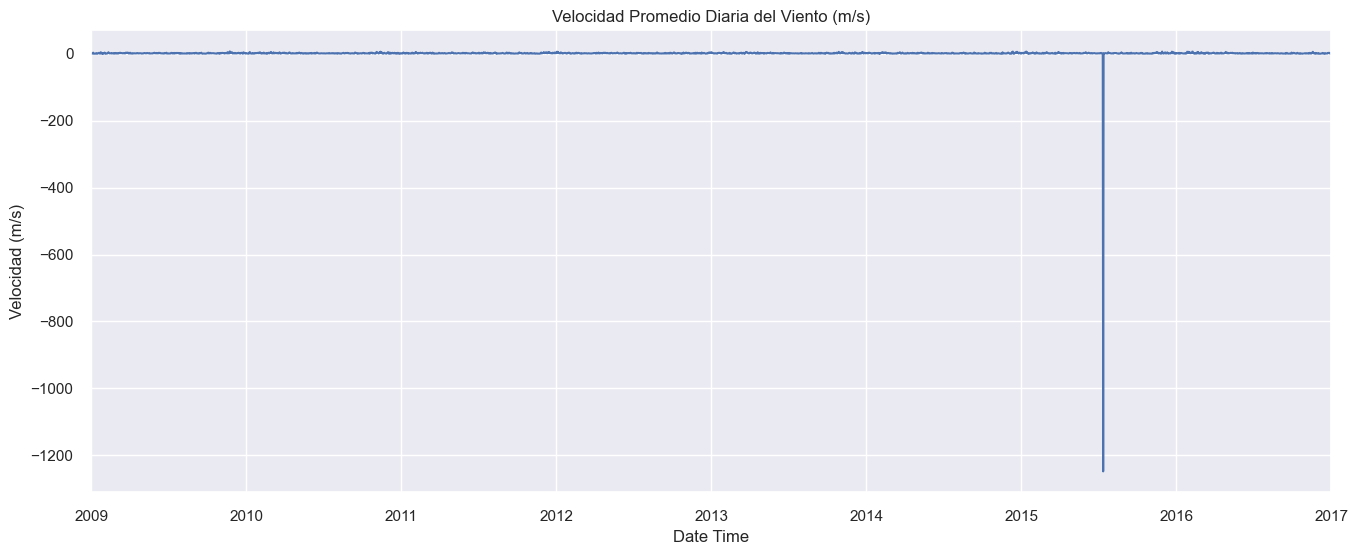

In [50]:
# Gráfico de la serie de tiempo de la velocidad del viento
plt.figure(figsize=(16, 6))
df_daily['wv'].plot(title='Velocidad Promedio Diaria del Viento (m/s)')
plt.ylabel('Velocidad (m/s)')
plt.show()

Se puede ver que hay un error de medición que debe ser removido.

In [51]:
# 1. Calcular la media (mean) de la columna
media_wv = df_daily['wv'].mean()

# 2. Identificar el valor mínimo de la columna
min_wv_value = df_daily['wv'].min()

# 3. Identificar la(s) fila(s) que contienen el valor mínimo
indices_a_imputar = df_daily['wv'] == min_wv_value

# 4. Reemplazar los valores mínimos con la media calculada
df_daily.loc[indices_a_imputar, 'wv'] = media_wv

# Se imprime la media y el nuevo valor mínimo para confirmar la imputación.
print(f"Media calculada de 'wv': {media_wv:.4f}")
print(f"Valor mínimo anterior (para referencia): {min_wv_value:.2f}")
print(f"Nuevo valor mínimo de 'wv' (debería ser mayor o igual a la media): {df_daily['wv'].min():.2f}")

Media calculada de 'wv': 1.7008
Valor mínimo anterior (para referencia): -1248.22
Nuevo valor mínimo de 'wv' (debería ser mayor o igual a la media): 0.00


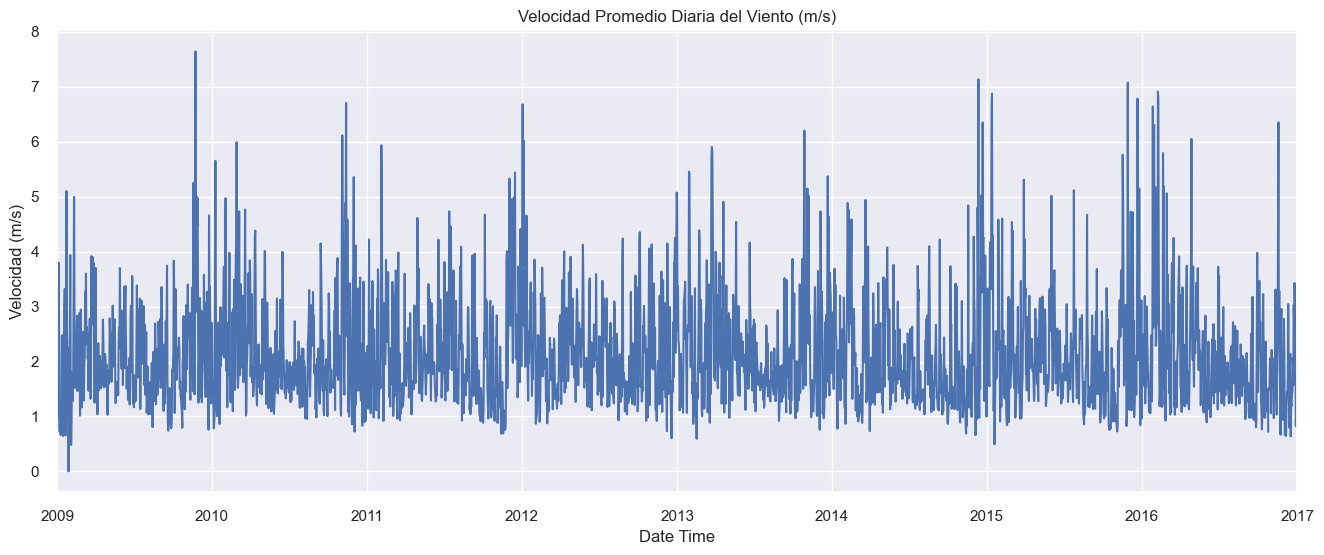

In [52]:
# Gráfico de la serie de tiempo de la velocidad del viento
plt.figure(figsize=(16, 6))
df_daily['wv'].plot(title='Velocidad Promedio Diaria del Viento (m/s)')
plt.ylabel('Velocidad (m/s)')
plt.show()

No parece existir una correlación entre el viento y la estación del año.

### Precipitación

Este dataset no cuenta con registros de lluvias.

In [ ]:
# # Gráfico de la serie de tiempo de la precipitación
# plt.figure(figsize=(16, 6))
# df_daily['rain'].plot(title='Precipitación Promedio Diaria (mm)', style='o', markersize=3)
# plt.ylabel('Precipitación (mm)')
# plt.show()

# # Histograma para ver la distribución (excluyendo los días sin lluvia para una mejor visualización)
# plt.figure(figsize=(10, 6))
# sns.histplot(df_daily[df_daily['rain'] > 0]['rain'], kde=True)
# plt.title('Distribución de la Precipitación en Días Lluviosos')
# plt.show()

### Radiación Solar

Este dataset no cuenta con registros de radiación solar.

In [ ]:
# # Gráfico de la serie de tiempo de la radiación solar
# plt.figure(figsize=(16, 6))
# df_daily['SWDR'].plot(title='Radiación Solar Promedio Diaria (W/m²)')
# plt.ylabel('Radiación (W/m²)')
# plt.show()

## Exploración de medias móviles

Se observó que la aplicación de Medias Móviles sobre las series podía aumentar la correlación de estas features con la variable target. Por este motivo, se decide explorar distintas ventanas temporales sobre las features seleccionadas para detectar cuáles aportan una mejora respecto a la feature original.

In [67]:
# DEFINICIÓN DE VENTANAS Y FEATURES
# Las ventanas se definen en NÚMERO DE PERIODOS (cada periodo es 10 minutos).

# Ventanas específicas: 30 min, 1h, 2h, 4h, 8h
ventanas_general = [3, 6, 12, 24, 48]
features_general = ['max. wv', 'VPdef']

# Ventanas específicas para Presión: 4h, 8h, 12h
ventanas_p = [24, 48, 72]
features_p = ['p']

all_features = features_general+features_p

# DataFrame para almacenar solo las Medias Móviles y el target 'T'
df_mm = df[['T']].copy()

# CÁLCULO DE MEDIAS MÓVILES (MM)
def calcular_mm(df, features, ventanas):
    """Calcula la Media Móvil para las features especificadas con las ventanas dadas."""
    for feature in features:
        for n in ventanas:
            # Crea el nuevo nombre de columna, e.g., 'SWDR_MM_6'
            nueva_col = f'{feature}_MM_{n}'
            df_mm[nueva_col] = df[feature].rolling(window=n, min_periods=1).mean()
    return df_mm

df_mm = calcular_mm(df, features_general, ventanas_general)
df_mm = calcular_mm(df, features_p, ventanas_p)

# Limpiar las primeras filas que pueden contener valores NaN
df_mm = df_mm.dropna()

print(f"Se calcularon {len(df_mm.columns) - 1} nuevas features de MM.")

# CÁLCULO Y ORDENAMIENTO DE LA CORRELACIÓN
# Calcular la matriz de correlación entre todas las MM y la Temperatura (T)
matriz_correlacion_mm = df_mm.corr()

# Extraer la columna de correlación con 'T'
correlacion_T_mm = matriz_correlacion_mm['T'].drop('T')

# Convertir a DataFrame, tomar el valor absoluto y ordenar
resultados_mm = pd.DataFrame(correlacion_T_mm).reset_index()
resultados_mm.columns = ['Feature', 'Correlacion_MM']
resultados_mm['Abs_Correlacion_MM'] = resultados_mm['Correlacion_MM'].abs()

# CÁLCULO DE CORRELACIÓN SIN MM (ORIGINAL)
# Calcular la correlación original entre las features y T
correlacion_original = df[all_features].corrwith(df['T']).to_frame('Correlacion_Original').reset_index()
correlacion_original.columns = ['Feature', 'Correlacion_Original']

# UNIFICACIÓN Y COMPARACIÓN
# Crear un diccionario para mapear la correlación original a las features MM
correlacion_map = correlacion_original.set_index('Feature')['Correlacion_Original'].to_dict()

# Función de ayuda para obtener la correlación original a partir del nombre de la feature MM
def get_original_corr(feature_mm_name):
    # Extrae el nombre original (ej. 'SWDR' de 'SWDR_MM_6')
    for original in all_features:
        if feature_mm_name.startswith(original):
            return correlacion_map.get(original)
    return None

# Aplicar la función a los resultados de MM
resultados_mm['Correlacion_Original'] = resultados_mm['Feature'].apply(get_original_corr)
resultados_mm['Abs_Correlacion_Original'] = resultados_mm['Correlacion_Original'].abs()

# Calcular la mejora absoluta en correlación
resultados_mm['Mejora_Abs'] = resultados_mm['Abs_Correlacion_MM'] - resultados_mm['Abs_Correlacion_Original']

# Ordenar por la correlación absoluta descendente de la MM
predictores_ordenados = resultados_mm.sort_values(by='Abs_Correlacion_MM', ascending=False)

# RESULTADOS FINALES
# Seleccionar las columnas a mostrar
columnas_finales = predictores_ordenados.head(10)[['Feature', 'Abs_Correlacion_MM', 'Abs_Correlacion_Original', 'Mejora_Abs']]


Se calcularon 13 nuevas features de MM.


In [68]:
columnas_finales.sort_values(by='Mejora_Abs',ascending=False)

Feature  Abs_Correlacion_MM  Abs_Correlacion_Original  Mejora_Abs
4   max. wv_MM_48            0.007777                  0.002871    0.004906
3   max. wv_MM_24            0.004902                  0.002871    0.002031
5      VPdef_MM_3            0.761430                  0.761744   -0.000314
6      VPdef_MM_6            0.760212                  0.761744   -0.001532
7     VPdef_MM_12            0.755969                  0.761744   -0.005776
10        p_MM_24            0.036668                  0.045375   -0.008707
11        p_MM_48            0.027084                  0.045375   -0.018291
8     VPdef_MM_24            0.741714                  0.761744   -0.020030
12        p_MM_72            0.018532                  0.045375   -0.026843
9     VPdef_MM_48            0.701609                  0.761744   -0.060135

De este análsiis, podemos concluir que ninguna de las features seleccionadas se beneficia significativamente de este proceso de suavizado del ruido.

In [ ]:
# # Usamos la matriz de correlación calculada en las celdas anteriores (matriz_correlacion_mm)
# matriz_correlacion_mm = df_mm[['T','SWDR_MM_48','max. PAR_MM_48']].corr()

# plt.figure(figsize=(12, 10))
# sns.heatmap(
#     matriz_correlacion_mm, 
#     annot=True,          # Mostrar los valores de correlación en las celdas
#     fmt=".2f",           # Formato con 2 decimales
#     cmap='coolwarm',     # Esquema de color para distinguir correlaciones positivas/negativas
#     cbar=True,           # Mostrar la barra de color
#     linewidths=.5        # Separación entre celdas
# )
# plt.title('Matriz de Correlación de Features con Media Móvil', fontsize=16)
# plt.show()

## Prueba de Estacionaridad

In [69]:
from statsmodels.tsa.stattools import adfuller

# 1. Asume que 'df' es tu DataFrame y 'T' la columna de interés
series = df['T'].dropna() 

# 2. Ejecutar la prueba ADF
result = adfuller(series, autolag='AIC')

# 3. Extraer y mostrar los resultados
print(f'Estadístico de Prueba ADF: {result[0]:.4f}')
print(f'Valor p (p-value): {result[1]:.4f}')
print('Valores Críticos:')
for key, value in result[4].items():
    print(f'\t{key}: {value:.4f}')

# 4. Interpretación Formal
p_value = result[1]
critical_value = result[4]['5%'] # Usamos el nivel de significancia del 5%

print("\nCONCLUSIÓN:") 

if p_value <= 0.05 and result[0] < critical_value:
    print("El valor p es <= 0.05 y el Estadístico ADF es menor que el valor crítico.")
    print("✅ RECHAZAMOS H0. La serie es probablemente ESTACIONARIA.")
else:
    print("El valor p es > 0.05 o el Estadístico ADF no es menor que el valor crítico.")
    print("❌ NO RECHAZAMOS H0. La serie NO es estacionaria.")

Estadístico de Prueba ADF: -9.3964
Valor p (p-value): 0.0000
Valores Críticos:
	1%: -3.4304
	5%: -2.8615
	10%: -2.5668

CONCLUSIÓN:
El valor p es <= 0.05 y el Estadístico ADF es menor que el valor crítico.
✅ RECHAZAMOS H0. La serie es probablemente ESTACIONARIA.


## Conclusiones EDA

### 1º) Relaciones Termodinámicas Clave (T, rh, VPdef)Temperatura y Humedad Relativa:
Se observa una fuerte correlación negativa entre la temperatura del aire ($\mathbf{T}$) y la humedad relativa ($\mathbf{rh}$). Esto es consistente con la física: a medida que el aire se calienta durante el día, su capacidad de retener vapor de agua aumenta, haciendo que la humedad relativa disminuya (y viceversa).

**Potencial de Secado:** El déficit de presión de vapor ($\mathbf{VPdef}$), que representa el potencial de secado del aire, muestra una fuerte correlación positiva con la temperatura ($\mathbf{T}$). Esto confirma que los días más cálidos (y menos húmedos en términos relativos) son los que tienen mayor capacidad para evaporar humedad.
1º) Fuerte Acoplamiento Físico (Correlación Muy Fuerte, $|R| > 0.90$)

### 2º) Fuerte Acoplamiento Físico
Existe una **colinealidad** extrema entre grupos de variables que miden fenómenos físicos estrechamente relacionados. Estas relaciones son esperadas y deben considerarse cuidadosamente para evitar la redundancia en los modelos.

| Relación | Coeficiente (R) | Conclusión |
| :--- | :--- | :--- |
| $\mathbf{T}$ vs $\mathbf{Tpot}$ | $0.997$ | La temperatura del aire y la temperatura potencial están **casi perfectamente acopladas**.
| $\mathbf{T}$ vs $\mathbf{VPmax}$ | $0.951$ | La temperatura y la presión de vapor saturado ($VPmax$) están **fuertemente ligadas**, confirmando que la capacidad del aire para contener vapor de agua es primariamente una función de la temperatura.
| $\mathbf{T}$ vs $\mathbf{rho}$ | $-0.963$ | La temperatura y la densidad del aire ($\rho$) presentan una **correlación negativa muy fuerte**, un principio básico de la termodinámica: el aire más cálido es menos denso.
| $\mathbf{Tdew}$ vs $\mathbf{T}$ | $\approx 0.896$ | El punto de rocío ($Tdew$) y la temperatura ($T$) están **muy fuertemente correlacionadas**.
| $\mathbf{H2OC}$, $\mathbf{VPact}$, $\mathbf{sh}$ vs $\mathbf{T}$ y $\mathbf{Tdew}$ | $\approx 0.87$ | Todas las Medidas de Humedad Absoluta (`VPact`, `H2OC`, `sh`) tienen una correlación fuerte entre ellas y con la temperatura (`T`) y el punto de rocío (`Tdew`).

### 3º) Calidad y Preparación de Datos:
Las variables de velocidad del viento ($\mathbf{wv}$ y $\mathbf{max. wv}$) contienen valores atípicos severos o códigos de error identificados como -9999.00. 

**Corrección Necesaria:** Estos valores han distorsionado la media y la desviación estándar y deben ser reemplazados por valores NaN y luego imputados o eliminados antes de cualquier modelado.

### 4º) Variables de Lluvia y Radiación (Datos Faltantes):
Es importante señalar que el dataset utilizado para este análisis carece de las mediciones directas de Lluvia (rain, raining), Radiación Solar (SWDR, PAR), y Tlog.

**Implicación para el Modelado:** Cualquier conclusión sobre la correlación o estacionalidad de la lluvia y la radiación no puede ser extraída de este EDA. Para predecir variables fuertemente ligadas a la energía solar (como T o VPdef) o para modelos de precipitación, estas variables externas deberán ser obtenidas y añadidas al dataset.